# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

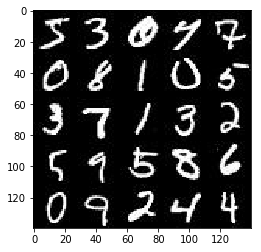

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

# Use this For lower tensor flow 
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

#use this For higher tensor flow 
#mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'RGB')
#pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

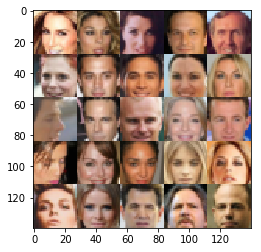

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
celeb_mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(celeb_mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32, (None,image_height,image_width, image_channels), name='input_real')
    input_z = tf.placeholder(tf.float32, (None,z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32,name='learning_rate')  
#    lr = tf.placeholder(float,shape=(),name='learning_rate')  
#    learning_rate =0.002

    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    alpha=0.1
    keep_prob= 0.9
    # TODO: Implement Function
    
    
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input is 28x28x3
        
        # make size 14x14x64
        conv1 = tf.layers.conv2d(images, 64, 5, strides=2,  padding='same', activation=None)
        lrelu1 = tf.maximum(conv1 * alpha, conv1)
        
        # change to 7x7x128
        conv2 = tf.layers.conv2d(lrelu1, 128, 5, strides=2, padding='same', activation=None)
        bn1 = tf.layers.batch_normalization(conv2, training=True)
        lrelu2 = tf.maximum(bn1 * alpha, bn1)
#        drp1 = tf.nn.dropout(lrelu2, keep_prob = keep_prob)
        
        
        # 4x4x256
        conv3 = tf.layers.conv2d(lrelu2, 256, 5, strides=2,  padding='same')
#        conv3 = tf.layers.conv2d(drp1, 256, 5, strides=2,  padding='same')
        bn2 = tf.layers.batch_normalization(conv3, training=True)
        lrelu3 = tf.maximum(bn2 * alpha, bn2)
#        drp2 = tf.nn.dropout(lrelu3, keep_prob = keep_prob)
        
        
        flat = tf.reshape(lrelu3, (-1, 4*4*256))
#        flat = tf.reshape(drp2, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.1
    keep_prob = 0.9
    
    with tf.variable_scope('generator', reuse=not is_train):
        # First fully connected layer
        # shape = 7x7x512
        x1 = tf.layers.dense(z, 7 * 7 * 512)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        
        # shape = 14x14x256
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
#        x2 = tf.nn.dropout(x2, keep_prob=keep_prob)
        
        # shape = 28x28x128
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
#        x3 = tf.nn.dropout(x3, keep_prob=keep_prob)
        
        # Output layer
        # shape = 28x28x5
#        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=1, padding='same')
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 3, strides=1, padding='same')
        
        out = tf.tanh(logits)
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    alpha = 0.1
    keep_prob = 0.9
    smooth = 0.1
    #discriminator(images, reuse=False)
    #generator(z, out_channel_dim, is_train=True)
    # Here we run the generator and the discriminator
    # Build the Model, g_model is the generator output
    g_model = generator(input_z, out_channel_dim,is_train=True)
    
    d_model_real, d_logits_real = discriminator(input_real,reuse=False)
    d_model_fake, d_logits_fake  = discriminator(g_model, reuse=True)
    
    
    
    
    # Here we compute `d_loss`, the loss for the discriminator.
    # This should combine two different losses:
    #  1. The loss for the GAN problem, where we minimize the cross-entropy for the binary
    #     real-vs-fake classification problem.
    #  2. The loss for the SVHN digit classification problem, where we minimize the cross-entropy
    #     for the multi-class softmax. For this one we use the labels. Don't forget to ignore
    #     use `label_mask` to ignore the examples that we are pretending are unlabeled for the
    #     semi-supervised learning problem.
    d_loss_real = tf.reduce_mean(
                  tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, 
                                                          labels=tf.ones_like(d_logits_real) * (1 - smooth)))
#    d_loss_fake = tf.reduce_mean(
#                  tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, 
#                                                          labels=tf.zeros_like(d_logits_real)))
    d_loss_fake = tf.reduce_mean(
                  tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, 
                                                          labels=tf.zeros_like(d_logits_fake)))
    
    d_loss = d_loss_real + d_loss_fake
    
    
    g_loss = tf.reduce_mean(
             tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,
                                                     labels=tf.ones_like(d_logits_fake)))
    
  
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    #learning_rate = 0.002

    # Get the trainable_variables, split into G and D parts
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]

    #d_train_opt = tf.train.AdamOptimizer(learning_rate).minimize(d_loss, var_list=d_vars)
    #g_train_opt = tf.train.AdamOptimizer(learning_rate).minimize(g_loss, var_list=g_vars)
    
    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

# GPU Constraint

https://www.tensorflow.org/programmers_guide/using_gpu

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config, ...)

config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.4
session = tf.Session(config=config, ...)

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    n_samples,image_width, image_height, image_channels = data_shape
    input_real, input_z, lr = model_inputs(image_width, image_height, image_channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, image_channels)
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1) 
    
    #saver = tf.train.Saver(var_list=g_vars)
    saver = tf.train.Saver()
    samples, losses = [], []
    steps = 0
    print_every=10
    show_every=100
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
#    config.gpu_options.per_process_gpu_memory_fraction = 0.4
#    with tf.Session() as sess:
    with tf.Session(config=config) as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images *= 2
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizersbatch_images, lr: learning_rate 
                _ = sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr:learning_rate})
                #_ = sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z})
#  _ = sess.run(g_train_opt, feed_dict={input_z: batch_z, input_real: batch_images, learning_rate: learning_rate })
                _ = sess.run(g_train_opt, feed_dict={input_real: batch_images,input_z: batch_z, lr:learning_rate })
                
                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Step :",steps,"Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))
                    
                if steps % show_every == 0:
                    n_images = 16
                    show_generator_output(sess, n_images, input_z, image_channels, data_image_mode)
                    
        saver.save(sess, './checkpoint/g_chkpoint.ckpt')
    return losses

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

(60000, 28, 28, 1) L
Step : 10 Epoch 1/2... Discriminator Loss: 0.7736... Generator Loss: 1.2389
Step : 20 Epoch 1/2... Discriminator Loss: 0.7539... Generator Loss: 1.2448
Step : 30 Epoch 1/2... Discriminator Loss: 0.6070... Generator Loss: 1.6147
Step : 40 Epoch 1/2... Discriminator Loss: 0.3979... Generator Loss: 2.9421
Step : 50 Epoch 1/2... Discriminator Loss: 0.3734... Generator Loss: 3.5174
Step : 60 Epoch 1/2... Discriminator Loss: 0.3559... Generator Loss: 4.0647
Step : 70 Epoch 1/2... Discriminator Loss: 1.6038... Generator Loss: 0.5083
Step : 80 Epoch 1/2... Discriminator Loss: 2.2892... Generator Loss: 0.2600
Step : 90 Epoch 1/2... Discriminator Loss: 1.2445... Generator Loss: 0.9897
Step : 100 Epoch 1/2... Discriminator Loss: 1.2294... Generator Loss: 0.9883


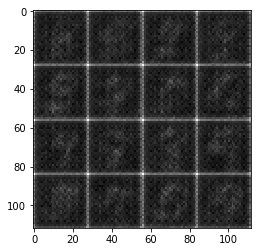

Step : 110 Epoch 1/2... Discriminator Loss: 1.2348... Generator Loss: 1.1027
Step : 120 Epoch 1/2... Discriminator Loss: 1.3229... Generator Loss: 0.7006
Step : 130 Epoch 1/2... Discriminator Loss: 1.2927... Generator Loss: 0.8699
Step : 140 Epoch 1/2... Discriminator Loss: 1.2127... Generator Loss: 0.6593
Step : 150 Epoch 1/2... Discriminator Loss: 1.1256... Generator Loss: 0.8147
Step : 160 Epoch 1/2... Discriminator Loss: 1.2490... Generator Loss: 0.8916
Step : 170 Epoch 1/2... Discriminator Loss: 1.1817... Generator Loss: 1.2486
Step : 180 Epoch 1/2... Discriminator Loss: 1.1430... Generator Loss: 1.2658
Step : 190 Epoch 1/2... Discriminator Loss: 1.0196... Generator Loss: 1.1411
Step : 200 Epoch 1/2... Discriminator Loss: 1.0695... Generator Loss: 0.9195


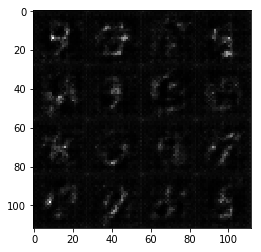

Step : 210 Epoch 1/2... Discriminator Loss: 1.1624... Generator Loss: 0.9798
Step : 220 Epoch 1/2... Discriminator Loss: 1.1304... Generator Loss: 1.3025
Step : 230 Epoch 1/2... Discriminator Loss: 0.8955... Generator Loss: 1.2071
Step : 240 Epoch 1/2... Discriminator Loss: 0.9783... Generator Loss: 1.1664
Step : 250 Epoch 1/2... Discriminator Loss: 1.2170... Generator Loss: 0.6511
Step : 260 Epoch 1/2... Discriminator Loss: 0.9619... Generator Loss: 1.4252
Step : 270 Epoch 1/2... Discriminator Loss: 0.9736... Generator Loss: 1.9476
Step : 280 Epoch 1/2... Discriminator Loss: 0.9653... Generator Loss: 1.1803
Step : 290 Epoch 1/2... Discriminator Loss: 0.8071... Generator Loss: 1.3742
Step : 300 Epoch 1/2... Discriminator Loss: 0.8654... Generator Loss: 1.4037


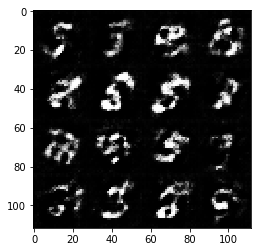

Step : 310 Epoch 1/2... Discriminator Loss: 0.8914... Generator Loss: 1.1606
Step : 320 Epoch 1/2... Discriminator Loss: 0.9696... Generator Loss: 0.9436
Step : 330 Epoch 1/2... Discriminator Loss: 0.7707... Generator Loss: 1.3042
Step : 340 Epoch 1/2... Discriminator Loss: 0.9506... Generator Loss: 0.9879
Step : 350 Epoch 1/2... Discriminator Loss: 0.9791... Generator Loss: 1.1082
Step : 360 Epoch 1/2... Discriminator Loss: 0.7598... Generator Loss: 1.5576
Step : 370 Epoch 1/2... Discriminator Loss: 0.8365... Generator Loss: 1.3794
Step : 380 Epoch 1/2... Discriminator Loss: 0.7785... Generator Loss: 1.5206
Step : 390 Epoch 1/2... Discriminator Loss: 0.6727... Generator Loss: 1.7786
Step : 400 Epoch 1/2... Discriminator Loss: 0.6265... Generator Loss: 2.0578


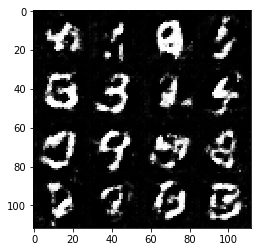

Step : 410 Epoch 1/2... Discriminator Loss: 0.9986... Generator Loss: 0.9656
Step : 420 Epoch 1/2... Discriminator Loss: 0.7942... Generator Loss: 1.4291
Step : 430 Epoch 1/2... Discriminator Loss: 0.7138... Generator Loss: 1.5655
Step : 440 Epoch 1/2... Discriminator Loss: 0.6585... Generator Loss: 1.6392
Step : 450 Epoch 1/2... Discriminator Loss: 0.8596... Generator Loss: 1.1674
Step : 460 Epoch 1/2... Discriminator Loss: 0.9548... Generator Loss: 0.9707
Step : 470 Epoch 1/2... Discriminator Loss: 0.9182... Generator Loss: 1.0112
Step : 480 Epoch 1/2... Discriminator Loss: 0.7667... Generator Loss: 1.4466
Step : 490 Epoch 1/2... Discriminator Loss: 1.0120... Generator Loss: 0.9587
Step : 500 Epoch 1/2... Discriminator Loss: 0.9514... Generator Loss: 0.9876


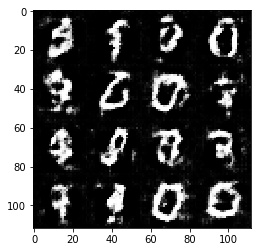

Step : 510 Epoch 1/2... Discriminator Loss: 0.8499... Generator Loss: 2.0453
Step : 520 Epoch 1/2... Discriminator Loss: 1.2641... Generator Loss: 0.5815
Step : 530 Epoch 1/2... Discriminator Loss: 0.7920... Generator Loss: 1.4003
Step : 540 Epoch 1/2... Discriminator Loss: 0.9176... Generator Loss: 1.0696
Step : 550 Epoch 1/2... Discriminator Loss: 1.3582... Generator Loss: 0.5782
Step : 560 Epoch 1/2... Discriminator Loss: 1.3697... Generator Loss: 0.5832
Step : 570 Epoch 1/2... Discriminator Loss: 0.7411... Generator Loss: 1.7453
Step : 580 Epoch 1/2... Discriminator Loss: 0.9713... Generator Loss: 0.9608
Step : 590 Epoch 1/2... Discriminator Loss: 1.0167... Generator Loss: 1.6099
Step : 600 Epoch 1/2... Discriminator Loss: 1.3294... Generator Loss: 0.5842


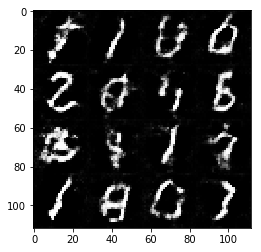

Step : 610 Epoch 1/2... Discriminator Loss: 0.7652... Generator Loss: 1.6403
Step : 620 Epoch 1/2... Discriminator Loss: 0.8863... Generator Loss: 1.3193
Step : 630 Epoch 1/2... Discriminator Loss: 0.9983... Generator Loss: 1.0907
Step : 640 Epoch 1/2... Discriminator Loss: 1.1545... Generator Loss: 1.5715
Step : 650 Epoch 1/2... Discriminator Loss: 1.0153... Generator Loss: 0.9993
Step : 660 Epoch 1/2... Discriminator Loss: 1.0144... Generator Loss: 1.2800
Step : 670 Epoch 1/2... Discriminator Loss: 1.2672... Generator Loss: 0.9430
Step : 680 Epoch 1/2... Discriminator Loss: 1.1813... Generator Loss: 0.7819
Step : 690 Epoch 1/2... Discriminator Loss: 1.0918... Generator Loss: 0.7727
Step : 700 Epoch 1/2... Discriminator Loss: 1.1401... Generator Loss: 1.1933


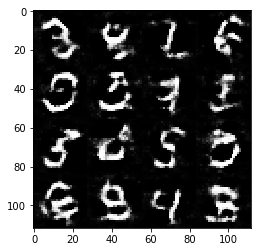

Step : 710 Epoch 1/2... Discriminator Loss: 0.9893... Generator Loss: 0.9341
Step : 720 Epoch 1/2... Discriminator Loss: 1.0285... Generator Loss: 0.8914
Step : 730 Epoch 1/2... Discriminator Loss: 1.0652... Generator Loss: 1.0734
Step : 740 Epoch 1/2... Discriminator Loss: 1.0278... Generator Loss: 1.0416
Step : 750 Epoch 1/2... Discriminator Loss: 1.2169... Generator Loss: 0.6769
Step : 760 Epoch 1/2... Discriminator Loss: 1.2036... Generator Loss: 0.6981
Step : 770 Epoch 1/2... Discriminator Loss: 1.0891... Generator Loss: 1.1830
Step : 780 Epoch 1/2... Discriminator Loss: 1.2655... Generator Loss: 0.6445
Step : 790 Epoch 1/2... Discriminator Loss: 1.1773... Generator Loss: 0.7929
Step : 800 Epoch 1/2... Discriminator Loss: 0.8565... Generator Loss: 1.4101


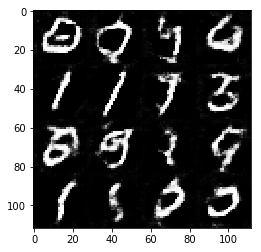

Step : 810 Epoch 1/2... Discriminator Loss: 0.9673... Generator Loss: 1.2086
Step : 820 Epoch 1/2... Discriminator Loss: 1.1247... Generator Loss: 0.8228
Step : 830 Epoch 1/2... Discriminator Loss: 0.8459... Generator Loss: 1.5904
Step : 840 Epoch 1/2... Discriminator Loss: 1.0781... Generator Loss: 0.8157
Step : 850 Epoch 1/2... Discriminator Loss: 1.1349... Generator Loss: 0.8986
Step : 860 Epoch 1/2... Discriminator Loss: 1.0116... Generator Loss: 0.9499
Step : 870 Epoch 1/2... Discriminator Loss: 0.8373... Generator Loss: 1.1245
Step : 880 Epoch 1/2... Discriminator Loss: 0.9596... Generator Loss: 0.9716
Step : 890 Epoch 1/2... Discriminator Loss: 1.0286... Generator Loss: 1.2388
Step : 900 Epoch 1/2... Discriminator Loss: 1.0268... Generator Loss: 1.2025


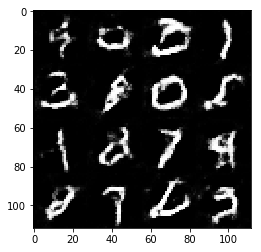

Step : 910 Epoch 1/2... Discriminator Loss: 0.9276... Generator Loss: 1.6614
Step : 920 Epoch 1/2... Discriminator Loss: 0.9632... Generator Loss: 1.1822
Step : 930 Epoch 1/2... Discriminator Loss: 0.9362... Generator Loss: 1.0695
Step : 940 Epoch 1/2... Discriminator Loss: 1.0307... Generator Loss: 0.9864
Step : 950 Epoch 1/2... Discriminator Loss: 1.1464... Generator Loss: 1.5594
Step : 960 Epoch 1/2... Discriminator Loss: 0.9627... Generator Loss: 1.0268
Step : 970 Epoch 1/2... Discriminator Loss: 1.0082... Generator Loss: 1.2483
Step : 980 Epoch 1/2... Discriminator Loss: 1.1790... Generator Loss: 0.9536
Step : 990 Epoch 1/2... Discriminator Loss: 0.8566... Generator Loss: 1.4871
Step : 1000 Epoch 1/2... Discriminator Loss: 1.0929... Generator Loss: 0.7780


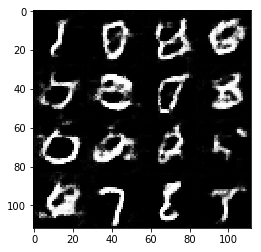

Step : 1010 Epoch 1/2... Discriminator Loss: 0.8372... Generator Loss: 1.8412
Step : 1020 Epoch 1/2... Discriminator Loss: 1.1827... Generator Loss: 0.6451
Step : 1030 Epoch 1/2... Discriminator Loss: 1.1262... Generator Loss: 0.8340
Step : 1040 Epoch 1/2... Discriminator Loss: 0.9187... Generator Loss: 1.4912
Step : 1050 Epoch 1/2... Discriminator Loss: 1.0308... Generator Loss: 1.3261
Step : 1060 Epoch 1/2... Discriminator Loss: 0.9980... Generator Loss: 1.0117
Step : 1070 Epoch 1/2... Discriminator Loss: 1.0487... Generator Loss: 0.9035
Step : 1080 Epoch 1/2... Discriminator Loss: 0.9883... Generator Loss: 1.3018
Step : 1090 Epoch 1/2... Discriminator Loss: 1.0500... Generator Loss: 1.0849
Step : 1100 Epoch 1/2... Discriminator Loss: 1.3615... Generator Loss: 0.5485


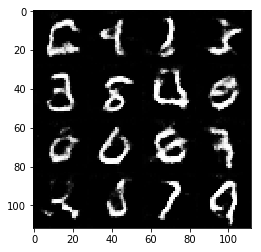

Step : 1110 Epoch 1/2... Discriminator Loss: 1.2045... Generator Loss: 0.9917
Step : 1120 Epoch 1/2... Discriminator Loss: 0.8705... Generator Loss: 1.6332
Step : 1130 Epoch 1/2... Discriminator Loss: 0.8996... Generator Loss: 1.3623
Step : 1140 Epoch 1/2... Discriminator Loss: 1.1879... Generator Loss: 0.7198
Step : 1150 Epoch 1/2... Discriminator Loss: 0.9958... Generator Loss: 0.9807
Step : 1160 Epoch 1/2... Discriminator Loss: 1.0728... Generator Loss: 0.7780
Step : 1170 Epoch 1/2... Discriminator Loss: 1.0613... Generator Loss: 0.9023
Step : 1180 Epoch 1/2... Discriminator Loss: 1.1682... Generator Loss: 1.3928
Step : 1190 Epoch 1/2... Discriminator Loss: 0.8914... Generator Loss: 1.3048
Step : 1200 Epoch 1/2... Discriminator Loss: 0.8402... Generator Loss: 1.1715


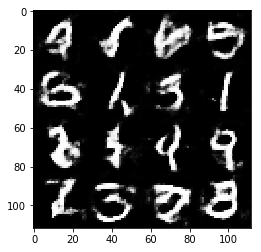

Step : 1210 Epoch 1/2... Discriminator Loss: 1.0285... Generator Loss: 0.9352
Step : 1220 Epoch 1/2... Discriminator Loss: 1.0329... Generator Loss: 0.9459
Step : 1230 Epoch 1/2... Discriminator Loss: 0.9038... Generator Loss: 1.3464
Step : 1240 Epoch 1/2... Discriminator Loss: 0.9875... Generator Loss: 1.4403
Step : 1250 Epoch 1/2... Discriminator Loss: 1.0347... Generator Loss: 0.9741
Step : 1260 Epoch 1/2... Discriminator Loss: 0.8679... Generator Loss: 1.4030
Step : 1270 Epoch 1/2... Discriminator Loss: 1.1675... Generator Loss: 0.7531
Step : 1280 Epoch 1/2... Discriminator Loss: 0.9372... Generator Loss: 1.2230
Step : 1290 Epoch 1/2... Discriminator Loss: 0.8524... Generator Loss: 1.7355
Step : 1300 Epoch 1/2... Discriminator Loss: 0.9792... Generator Loss: 1.1503


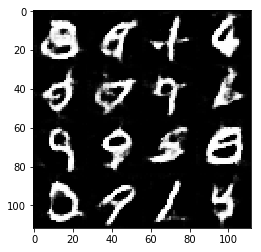

Step : 1310 Epoch 1/2... Discriminator Loss: 1.1645... Generator Loss: 0.7157
Step : 1320 Epoch 1/2... Discriminator Loss: 0.9871... Generator Loss: 1.1570
Step : 1330 Epoch 1/2... Discriminator Loss: 0.8198... Generator Loss: 1.4795
Step : 1340 Epoch 1/2... Discriminator Loss: 0.9491... Generator Loss: 1.1346
Step : 1350 Epoch 1/2... Discriminator Loss: 1.1123... Generator Loss: 0.9180
Step : 1360 Epoch 1/2... Discriminator Loss: 0.9023... Generator Loss: 1.2001
Step : 1370 Epoch 1/2... Discriminator Loss: 1.0797... Generator Loss: 0.8317
Step : 1380 Epoch 1/2... Discriminator Loss: 1.0489... Generator Loss: 0.9198
Step : 1390 Epoch 1/2... Discriminator Loss: 0.9528... Generator Loss: 1.0220
Step : 1400 Epoch 1/2... Discriminator Loss: 1.0960... Generator Loss: 0.8631


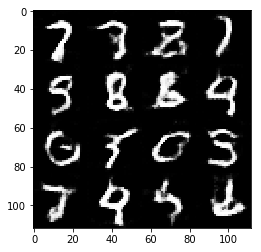

Step : 1410 Epoch 1/2... Discriminator Loss: 0.9701... Generator Loss: 1.6072
Step : 1420 Epoch 1/2... Discriminator Loss: 1.1153... Generator Loss: 1.1507
Step : 1430 Epoch 1/2... Discriminator Loss: 0.9054... Generator Loss: 1.1641
Step : 1440 Epoch 1/2... Discriminator Loss: 0.8880... Generator Loss: 1.1031
Step : 1450 Epoch 1/2... Discriminator Loss: 0.9564... Generator Loss: 1.4553
Step : 1460 Epoch 1/2... Discriminator Loss: 1.0631... Generator Loss: 0.7911
Step : 1470 Epoch 1/2... Discriminator Loss: 1.0825... Generator Loss: 0.9494
Step : 1480 Epoch 1/2... Discriminator Loss: 1.0667... Generator Loss: 0.9206
Step : 1490 Epoch 1/2... Discriminator Loss: 1.0511... Generator Loss: 1.2577
Step : 1500 Epoch 1/2... Discriminator Loss: 0.8854... Generator Loss: 1.3923


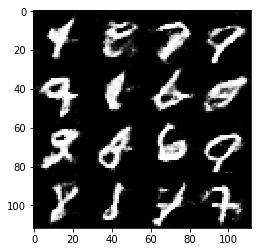

Step : 1510 Epoch 1/2... Discriminator Loss: 1.0080... Generator Loss: 1.3840
Step : 1520 Epoch 1/2... Discriminator Loss: 0.9588... Generator Loss: 0.9714
Step : 1530 Epoch 1/2... Discriminator Loss: 0.9043... Generator Loss: 1.1437
Step : 1540 Epoch 1/2... Discriminator Loss: 1.2652... Generator Loss: 0.6679
Step : 1550 Epoch 1/2... Discriminator Loss: 1.0785... Generator Loss: 1.1319
Step : 1560 Epoch 1/2... Discriminator Loss: 0.9927... Generator Loss: 1.1620
Step : 1570 Epoch 1/2... Discriminator Loss: 1.0324... Generator Loss: 0.9301
Step : 1580 Epoch 1/2... Discriminator Loss: 0.9850... Generator Loss: 0.9019
Step : 1590 Epoch 1/2... Discriminator Loss: 1.0007... Generator Loss: 0.9789
Step : 1600 Epoch 1/2... Discriminator Loss: 1.3082... Generator Loss: 0.6123


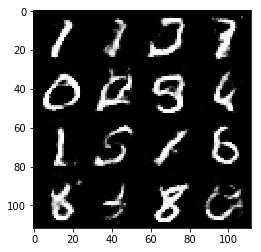

Step : 1610 Epoch 1/2... Discriminator Loss: 0.9916... Generator Loss: 0.9363
Step : 1620 Epoch 1/2... Discriminator Loss: 0.9589... Generator Loss: 0.9037
Step : 1630 Epoch 1/2... Discriminator Loss: 0.9470... Generator Loss: 1.2025
Step : 1640 Epoch 1/2... Discriminator Loss: 0.9159... Generator Loss: 1.0980
Step : 1650 Epoch 1/2... Discriminator Loss: 1.0365... Generator Loss: 0.9812
Step : 1660 Epoch 1/2... Discriminator Loss: 0.8023... Generator Loss: 1.3828
Step : 1670 Epoch 1/2... Discriminator Loss: 1.1505... Generator Loss: 0.6798
Step : 1680 Epoch 1/2... Discriminator Loss: 0.9752... Generator Loss: 0.9582
Step : 1690 Epoch 1/2... Discriminator Loss: 0.7717... Generator Loss: 1.5647
Step : 1700 Epoch 1/2... Discriminator Loss: 0.8959... Generator Loss: 1.0490


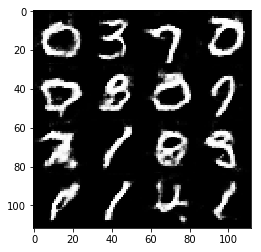

Step : 1710 Epoch 1/2... Discriminator Loss: 1.1107... Generator Loss: 0.7175
Step : 1720 Epoch 1/2... Discriminator Loss: 1.0000... Generator Loss: 1.0778
Step : 1730 Epoch 1/2... Discriminator Loss: 1.0007... Generator Loss: 1.2707
Step : 1740 Epoch 1/2... Discriminator Loss: 0.7793... Generator Loss: 1.3388
Step : 1750 Epoch 1/2... Discriminator Loss: 1.0949... Generator Loss: 0.9881
Step : 1760 Epoch 1/2... Discriminator Loss: 0.8317... Generator Loss: 1.7705
Step : 1770 Epoch 1/2... Discriminator Loss: 0.9254... Generator Loss: 1.7595
Step : 1780 Epoch 1/2... Discriminator Loss: 1.1265... Generator Loss: 0.7212
Step : 1790 Epoch 1/2... Discriminator Loss: 1.0801... Generator Loss: 0.7977
Step : 1800 Epoch 1/2... Discriminator Loss: 0.8740... Generator Loss: 1.2552


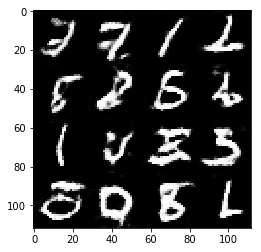

Step : 1810 Epoch 1/2... Discriminator Loss: 1.2103... Generator Loss: 0.6286
Step : 1820 Epoch 1/2... Discriminator Loss: 0.7974... Generator Loss: 1.1421
Step : 1830 Epoch 1/2... Discriminator Loss: 1.0578... Generator Loss: 1.9671
Step : 1840 Epoch 1/2... Discriminator Loss: 1.2827... Generator Loss: 0.5938
Step : 1850 Epoch 1/2... Discriminator Loss: 0.8806... Generator Loss: 1.3580
Step : 1860 Epoch 1/2... Discriminator Loss: 0.8867... Generator Loss: 1.2674
Step : 1870 Epoch 1/2... Discriminator Loss: 0.9972... Generator Loss: 1.0322
Step : 1880 Epoch 1/2... Discriminator Loss: 0.7451... Generator Loss: 1.6061
Step : 1890 Epoch 1/2... Discriminator Loss: 0.8023... Generator Loss: 1.2225
Step : 1900 Epoch 1/2... Discriminator Loss: 0.8897... Generator Loss: 1.2715


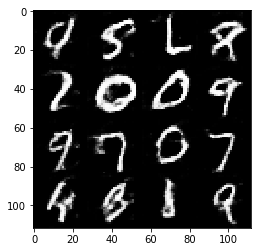

Step : 1910 Epoch 1/2... Discriminator Loss: 0.8132... Generator Loss: 1.3806
Step : 1920 Epoch 1/2... Discriminator Loss: 0.8361... Generator Loss: 1.3182
Step : 1930 Epoch 1/2... Discriminator Loss: 0.9206... Generator Loss: 1.4414
Step : 1940 Epoch 1/2... Discriminator Loss: 0.8435... Generator Loss: 1.7025
Step : 1950 Epoch 1/2... Discriminator Loss: 0.6950... Generator Loss: 1.4923
Step : 1960 Epoch 1/2... Discriminator Loss: 1.0610... Generator Loss: 0.8621
Step : 1970 Epoch 1/2... Discriminator Loss: 1.2471... Generator Loss: 1.6721
Step : 1980 Epoch 1/2... Discriminator Loss: 0.8378... Generator Loss: 1.2876
Step : 1990 Epoch 1/2... Discriminator Loss: 0.9341... Generator Loss: 1.4864
Step : 2000 Epoch 1/2... Discriminator Loss: 0.8287... Generator Loss: 1.3336


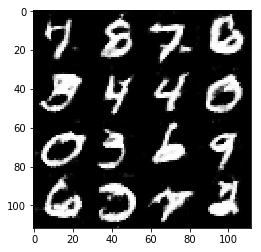

Step : 2010 Epoch 1/2... Discriminator Loss: 0.9425... Generator Loss: 2.1200
Step : 2020 Epoch 1/2... Discriminator Loss: 1.3693... Generator Loss: 0.6394
Step : 2030 Epoch 1/2... Discriminator Loss: 0.8594... Generator Loss: 1.1040
Step : 2040 Epoch 1/2... Discriminator Loss: 1.1098... Generator Loss: 0.8860
Step : 2050 Epoch 1/2... Discriminator Loss: 0.9670... Generator Loss: 0.9048
Step : 2060 Epoch 1/2... Discriminator Loss: 0.9850... Generator Loss: 1.0941
Step : 2070 Epoch 1/2... Discriminator Loss: 0.9130... Generator Loss: 1.1488
Step : 2080 Epoch 1/2... Discriminator Loss: 0.8606... Generator Loss: 1.3391
Step : 2090 Epoch 1/2... Discriminator Loss: 1.1301... Generator Loss: 0.7212
Step : 2100 Epoch 1/2... Discriminator Loss: 0.9772... Generator Loss: 1.0204


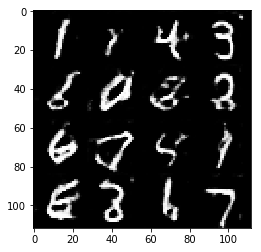

Step : 2110 Epoch 1/2... Discriminator Loss: 0.9406... Generator Loss: 1.1401
Step : 2120 Epoch 1/2... Discriminator Loss: 0.8774... Generator Loss: 1.4924
Step : 2130 Epoch 1/2... Discriminator Loss: 0.8602... Generator Loss: 1.2380
Step : 2140 Epoch 1/2... Discriminator Loss: 0.8204... Generator Loss: 1.3361
Step : 2150 Epoch 2/2... Discriminator Loss: 1.1229... Generator Loss: 0.9217
Step : 2160 Epoch 2/2... Discriminator Loss: 0.8832... Generator Loss: 1.4069
Step : 2170 Epoch 2/2... Discriminator Loss: 0.7944... Generator Loss: 1.4154
Step : 2180 Epoch 2/2... Discriminator Loss: 1.1502... Generator Loss: 0.8043
Step : 2190 Epoch 2/2... Discriminator Loss: 0.9374... Generator Loss: 1.2515
Step : 2200 Epoch 2/2... Discriminator Loss: 0.9647... Generator Loss: 1.2037


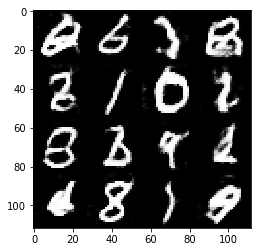

Step : 2210 Epoch 2/2... Discriminator Loss: 1.2629... Generator Loss: 0.6160
Step : 2220 Epoch 2/2... Discriminator Loss: 1.1524... Generator Loss: 1.0217
Step : 2230 Epoch 2/2... Discriminator Loss: 0.9549... Generator Loss: 0.9877
Step : 2240 Epoch 2/2... Discriminator Loss: 1.0122... Generator Loss: 0.8338
Step : 2250 Epoch 2/2... Discriminator Loss: 0.8821... Generator Loss: 1.6462
Step : 2260 Epoch 2/2... Discriminator Loss: 1.2492... Generator Loss: 1.3604
Step : 2270 Epoch 2/2... Discriminator Loss: 0.7936... Generator Loss: 1.2827
Step : 2280 Epoch 2/2... Discriminator Loss: 1.2022... Generator Loss: 0.6110
Step : 2290 Epoch 2/2... Discriminator Loss: 1.2905... Generator Loss: 1.0042
Step : 2300 Epoch 2/2... Discriminator Loss: 0.9648... Generator Loss: 0.9885


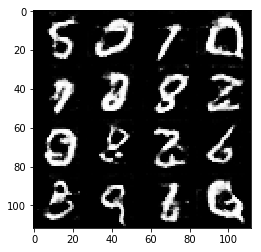

Step : 2310 Epoch 2/2... Discriminator Loss: 0.8989... Generator Loss: 1.0842
Step : 2320 Epoch 2/2... Discriminator Loss: 0.6958... Generator Loss: 1.5883
Step : 2330 Epoch 2/2... Discriminator Loss: 0.8747... Generator Loss: 1.3280
Step : 2340 Epoch 2/2... Discriminator Loss: 0.8878... Generator Loss: 0.9726
Step : 2350 Epoch 2/2... Discriminator Loss: 1.0451... Generator Loss: 1.5959
Step : 2360 Epoch 2/2... Discriminator Loss: 1.2983... Generator Loss: 0.5700
Step : 2370 Epoch 2/2... Discriminator Loss: 1.4322... Generator Loss: 0.4944
Step : 2380 Epoch 2/2... Discriminator Loss: 0.9923... Generator Loss: 1.1918
Step : 2390 Epoch 2/2... Discriminator Loss: 0.7453... Generator Loss: 1.6873
Step : 2400 Epoch 2/2... Discriminator Loss: 1.1000... Generator Loss: 0.7263


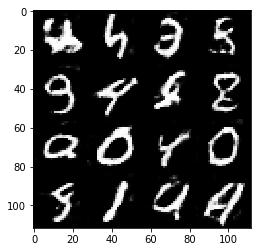

Step : 2410 Epoch 2/2... Discriminator Loss: 1.0071... Generator Loss: 0.9341
Step : 2420 Epoch 2/2... Discriminator Loss: 1.0138... Generator Loss: 0.8899
Step : 2430 Epoch 2/2... Discriminator Loss: 0.9943... Generator Loss: 1.0519
Step : 2440 Epoch 2/2... Discriminator Loss: 1.1289... Generator Loss: 0.8411
Step : 2450 Epoch 2/2... Discriminator Loss: 0.9930... Generator Loss: 1.0865
Step : 2460 Epoch 2/2... Discriminator Loss: 1.3397... Generator Loss: 0.5342
Step : 2470 Epoch 2/2... Discriminator Loss: 0.8582... Generator Loss: 1.4529
Step : 2480 Epoch 2/2... Discriminator Loss: 1.2535... Generator Loss: 0.6502
Step : 2490 Epoch 2/2... Discriminator Loss: 1.0277... Generator Loss: 0.8715
Step : 2500 Epoch 2/2... Discriminator Loss: 0.8615... Generator Loss: 1.1884


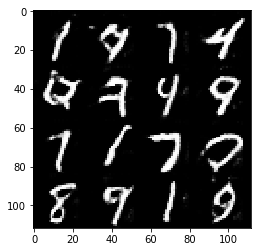

Step : 2510 Epoch 2/2... Discriminator Loss: 0.9523... Generator Loss: 0.9273
Step : 2520 Epoch 2/2... Discriminator Loss: 0.8873... Generator Loss: 1.2400
Step : 2530 Epoch 2/2... Discriminator Loss: 1.0642... Generator Loss: 1.4848
Step : 2540 Epoch 2/2... Discriminator Loss: 0.7639... Generator Loss: 1.4342
Step : 2550 Epoch 2/2... Discriminator Loss: 1.0442... Generator Loss: 1.1905
Step : 2560 Epoch 2/2... Discriminator Loss: 0.7110... Generator Loss: 1.4409
Step : 2570 Epoch 2/2... Discriminator Loss: 0.9460... Generator Loss: 1.4789
Step : 2580 Epoch 2/2... Discriminator Loss: 0.9266... Generator Loss: 1.0724
Step : 2590 Epoch 2/2... Discriminator Loss: 0.8449... Generator Loss: 1.0942
Step : 2600 Epoch 2/2... Discriminator Loss: 0.8041... Generator Loss: 1.2597


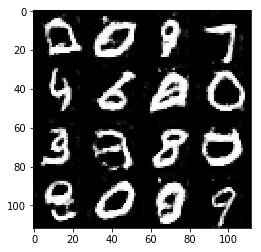

Step : 2610 Epoch 2/2... Discriminator Loss: 1.4824... Generator Loss: 0.4690
Step : 2620 Epoch 2/2... Discriminator Loss: 0.7834... Generator Loss: 1.2492
Step : 2630 Epoch 2/2... Discriminator Loss: 1.3922... Generator Loss: 0.5591
Step : 2640 Epoch 2/2... Discriminator Loss: 1.0818... Generator Loss: 1.5400
Step : 2650 Epoch 2/2... Discriminator Loss: 0.9024... Generator Loss: 1.8457
Step : 2660 Epoch 2/2... Discriminator Loss: 1.3611... Generator Loss: 0.5331
Step : 2670 Epoch 2/2... Discriminator Loss: 0.9952... Generator Loss: 0.9221
Step : 2680 Epoch 2/2... Discriminator Loss: 0.9038... Generator Loss: 1.0345
Step : 2690 Epoch 2/2... Discriminator Loss: 1.0573... Generator Loss: 0.8721
Step : 2700 Epoch 2/2... Discriminator Loss: 1.0176... Generator Loss: 0.9211


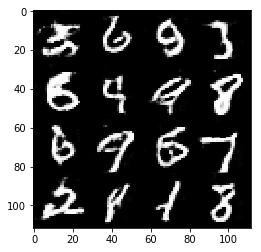

Step : 2710 Epoch 2/2... Discriminator Loss: 0.8275... Generator Loss: 1.2886
Step : 2720 Epoch 2/2... Discriminator Loss: 0.9522... Generator Loss: 1.7537
Step : 2730 Epoch 2/2... Discriminator Loss: 0.9679... Generator Loss: 0.8513
Step : 2740 Epoch 2/2... Discriminator Loss: 0.7673... Generator Loss: 1.4113
Step : 2750 Epoch 2/2... Discriminator Loss: 1.0119... Generator Loss: 1.0376
Step : 2760 Epoch 2/2... Discriminator Loss: 0.9632... Generator Loss: 1.4850
Step : 2770 Epoch 2/2... Discriminator Loss: 1.0074... Generator Loss: 1.0178
Step : 2780 Epoch 2/2... Discriminator Loss: 1.2892... Generator Loss: 0.6529
Step : 2790 Epoch 2/2... Discriminator Loss: 0.8894... Generator Loss: 1.0832
Step : 2800 Epoch 2/2... Discriminator Loss: 0.9085... Generator Loss: 1.2603


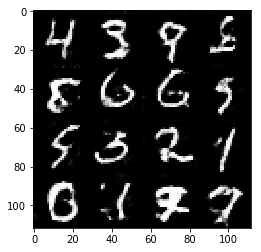

Step : 2810 Epoch 2/2... Discriminator Loss: 0.8439... Generator Loss: 1.2453
Step : 2820 Epoch 2/2... Discriminator Loss: 1.3813... Generator Loss: 0.5003
Step : 2830 Epoch 2/2... Discriminator Loss: 0.7813... Generator Loss: 1.5196
Step : 2840 Epoch 2/2... Discriminator Loss: 0.8506... Generator Loss: 1.2168
Step : 2850 Epoch 2/2... Discriminator Loss: 1.1427... Generator Loss: 0.6868
Step : 2860 Epoch 2/2... Discriminator Loss: 0.8597... Generator Loss: 1.1532
Step : 2870 Epoch 2/2... Discriminator Loss: 0.8323... Generator Loss: 1.3427
Step : 2880 Epoch 2/2... Discriminator Loss: 1.1310... Generator Loss: 0.8382
Step : 2890 Epoch 2/2... Discriminator Loss: 0.9373... Generator Loss: 1.0243
Step : 2900 Epoch 2/2... Discriminator Loss: 0.8063... Generator Loss: 1.2576


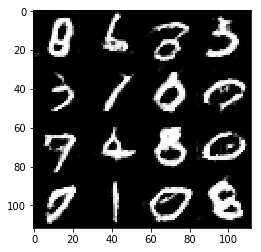

Step : 2910 Epoch 2/2... Discriminator Loss: 1.2398... Generator Loss: 0.6997
Step : 2920 Epoch 2/2... Discriminator Loss: 0.9261... Generator Loss: 1.1807
Step : 2930 Epoch 2/2... Discriminator Loss: 0.9036... Generator Loss: 1.0883
Step : 2940 Epoch 2/2... Discriminator Loss: 0.8769... Generator Loss: 1.2539
Step : 2950 Epoch 2/2... Discriminator Loss: 0.9268... Generator Loss: 1.0460
Step : 2960 Epoch 2/2... Discriminator Loss: 0.9793... Generator Loss: 0.9028
Step : 2970 Epoch 2/2... Discriminator Loss: 0.9686... Generator Loss: 0.9396
Step : 2980 Epoch 2/2... Discriminator Loss: 0.9825... Generator Loss: 1.0828
Step : 2990 Epoch 2/2... Discriminator Loss: 1.4037... Generator Loss: 0.5728
Step : 3000 Epoch 2/2... Discriminator Loss: 1.6470... Generator Loss: 0.4037


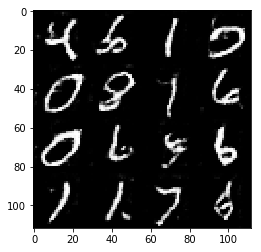

Step : 3010 Epoch 2/2... Discriminator Loss: 0.7366... Generator Loss: 1.3453
Step : 3020 Epoch 2/2... Discriminator Loss: 1.3104... Generator Loss: 0.5414
Step : 3030 Epoch 2/2... Discriminator Loss: 1.2345... Generator Loss: 1.5365
Step : 3040 Epoch 2/2... Discriminator Loss: 1.0103... Generator Loss: 0.9423
Step : 3050 Epoch 2/2... Discriminator Loss: 0.8552... Generator Loss: 1.5041
Step : 3060 Epoch 2/2... Discriminator Loss: 1.2509... Generator Loss: 0.6361
Step : 3070 Epoch 2/2... Discriminator Loss: 0.9212... Generator Loss: 1.1662
Step : 3080 Epoch 2/2... Discriminator Loss: 0.9421... Generator Loss: 1.1392
Step : 3090 Epoch 2/2... Discriminator Loss: 0.8034... Generator Loss: 1.4445
Step : 3100 Epoch 2/2... Discriminator Loss: 1.3416... Generator Loss: 0.6128


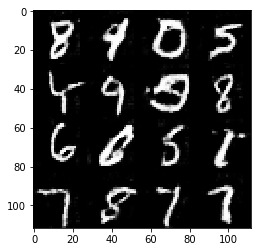

Step : 3110 Epoch 2/2... Discriminator Loss: 0.9666... Generator Loss: 1.0389
Step : 3120 Epoch 2/2... Discriminator Loss: 1.1878... Generator Loss: 0.6976
Step : 3130 Epoch 2/2... Discriminator Loss: 0.8854... Generator Loss: 1.2533
Step : 3140 Epoch 2/2... Discriminator Loss: 0.9137... Generator Loss: 1.1212
Step : 3150 Epoch 2/2... Discriminator Loss: 1.1751... Generator Loss: 0.7584
Step : 3160 Epoch 2/2... Discriminator Loss: 0.7284... Generator Loss: 1.4507
Step : 3170 Epoch 2/2... Discriminator Loss: 0.8611... Generator Loss: 1.2445
Step : 3180 Epoch 2/2... Discriminator Loss: 1.0133... Generator Loss: 1.3828
Step : 3190 Epoch 2/2... Discriminator Loss: 0.8218... Generator Loss: 1.3771
Step : 3200 Epoch 2/2... Discriminator Loss: 1.1289... Generator Loss: 0.7008


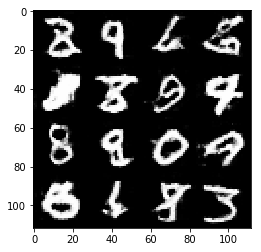

Step : 3210 Epoch 2/2... Discriminator Loss: 1.4978... Generator Loss: 0.5098
Step : 3220 Epoch 2/2... Discriminator Loss: 1.4864... Generator Loss: 0.4471
Step : 3230 Epoch 2/2... Discriminator Loss: 0.7856... Generator Loss: 1.2208
Step : 3240 Epoch 2/2... Discriminator Loss: 0.9829... Generator Loss: 1.0582
Step : 3250 Epoch 2/2... Discriminator Loss: 1.0477... Generator Loss: 0.7924
Step : 3260 Epoch 2/2... Discriminator Loss: 0.9420... Generator Loss: 1.1422
Step : 3270 Epoch 2/2... Discriminator Loss: 0.9162... Generator Loss: 1.1240
Step : 3280 Epoch 2/2... Discriminator Loss: 0.9945... Generator Loss: 0.8723
Step : 3290 Epoch 2/2... Discriminator Loss: 1.1025... Generator Loss: 0.8025
Step : 3300 Epoch 2/2... Discriminator Loss: 1.1004... Generator Loss: 0.7966


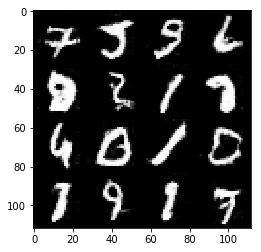

Step : 3310 Epoch 2/2... Discriminator Loss: 1.2145... Generator Loss: 0.7486
Step : 3320 Epoch 2/2... Discriminator Loss: 0.9517... Generator Loss: 1.0956
Step : 3330 Epoch 2/2... Discriminator Loss: 0.7646... Generator Loss: 1.9475
Step : 3340 Epoch 2/2... Discriminator Loss: 0.8336... Generator Loss: 1.3190
Step : 3350 Epoch 2/2... Discriminator Loss: 1.1263... Generator Loss: 0.7543
Step : 3360 Epoch 2/2... Discriminator Loss: 1.1010... Generator Loss: 0.7177
Step : 3370 Epoch 2/2... Discriminator Loss: 0.7600... Generator Loss: 1.5159
Step : 3380 Epoch 2/2... Discriminator Loss: 0.9146... Generator Loss: 1.1387
Step : 3390 Epoch 2/2... Discriminator Loss: 0.8500... Generator Loss: 1.2450
Step : 3400 Epoch 2/2... Discriminator Loss: 1.0440... Generator Loss: 1.0696


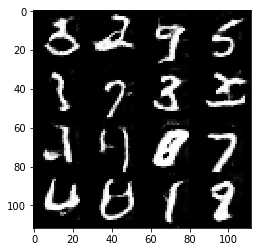

Step : 3410 Epoch 2/2... Discriminator Loss: 1.0992... Generator Loss: 1.4548
Step : 3420 Epoch 2/2... Discriminator Loss: 0.8600... Generator Loss: 1.2244
Step : 3430 Epoch 2/2... Discriminator Loss: 1.4485... Generator Loss: 0.5650
Step : 3440 Epoch 2/2... Discriminator Loss: 1.2155... Generator Loss: 0.6264
Step : 3450 Epoch 2/2... Discriminator Loss: 1.1356... Generator Loss: 0.8968
Step : 3460 Epoch 2/2... Discriminator Loss: 0.8937... Generator Loss: 1.1229
Step : 3470 Epoch 2/2... Discriminator Loss: 1.0848... Generator Loss: 0.7811
Step : 3480 Epoch 2/2... Discriminator Loss: 0.7536... Generator Loss: 1.2835
Step : 3490 Epoch 2/2... Discriminator Loss: 1.0182... Generator Loss: 0.8080
Step : 3500 Epoch 2/2... Discriminator Loss: 1.1577... Generator Loss: 0.7278


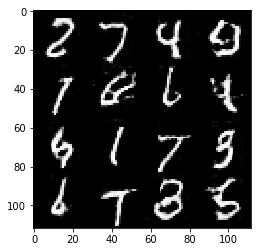

Step : 3510 Epoch 2/2... Discriminator Loss: 0.9917... Generator Loss: 0.9338
Step : 3520 Epoch 2/2... Discriminator Loss: 1.0270... Generator Loss: 0.8204
Step : 3530 Epoch 2/2... Discriminator Loss: 1.1939... Generator Loss: 0.7250
Step : 3540 Epoch 2/2... Discriminator Loss: 0.6526... Generator Loss: 1.5793
Step : 3550 Epoch 2/2... Discriminator Loss: 1.0584... Generator Loss: 0.8863
Step : 3560 Epoch 2/2... Discriminator Loss: 0.7935... Generator Loss: 1.5376
Step : 3570 Epoch 2/2... Discriminator Loss: 1.0606... Generator Loss: 1.3697
Step : 3580 Epoch 2/2... Discriminator Loss: 0.8734... Generator Loss: 1.4303
Step : 3590 Epoch 2/2... Discriminator Loss: 0.9574... Generator Loss: 1.5200
Step : 3600 Epoch 2/2... Discriminator Loss: 1.1069... Generator Loss: 0.8017


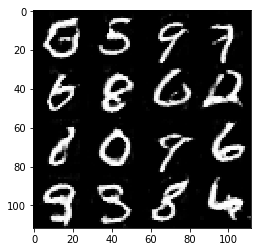

Step : 3610 Epoch 2/2... Discriminator Loss: 0.7912... Generator Loss: 1.1073
Step : 3620 Epoch 2/2... Discriminator Loss: 1.3354... Generator Loss: 0.5709
Step : 3630 Epoch 2/2... Discriminator Loss: 1.1878... Generator Loss: 1.9473
Step : 3640 Epoch 2/2... Discriminator Loss: 0.9541... Generator Loss: 0.9457
Step : 3650 Epoch 2/2... Discriminator Loss: 0.8942... Generator Loss: 1.7830
Step : 3660 Epoch 2/2... Discriminator Loss: 0.9603... Generator Loss: 1.3211
Step : 3670 Epoch 2/2... Discriminator Loss: 0.8863... Generator Loss: 1.2954
Step : 3680 Epoch 2/2... Discriminator Loss: 1.0113... Generator Loss: 1.0891
Step : 3690 Epoch 2/2... Discriminator Loss: 1.1825... Generator Loss: 0.6500
Step : 3700 Epoch 2/2... Discriminator Loss: 0.8798... Generator Loss: 1.2666


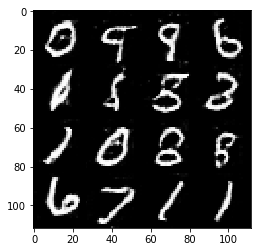

Step : 3710 Epoch 2/2... Discriminator Loss: 0.8536... Generator Loss: 1.1521
Step : 3720 Epoch 2/2... Discriminator Loss: 0.8334... Generator Loss: 1.2341
Step : 3730 Epoch 2/2... Discriminator Loss: 0.8183... Generator Loss: 1.1553
Step : 3740 Epoch 2/2... Discriminator Loss: 0.8009... Generator Loss: 1.3052
Step : 3750 Epoch 2/2... Discriminator Loss: 0.8432... Generator Loss: 1.1967
Step : 3760 Epoch 2/2... Discriminator Loss: 1.1277... Generator Loss: 0.8050
Step : 3770 Epoch 2/2... Discriminator Loss: 0.8907... Generator Loss: 1.0639
Step : 3780 Epoch 2/2... Discriminator Loss: 0.9258... Generator Loss: 1.1220
Step : 3790 Epoch 2/2... Discriminator Loss: 0.7928... Generator Loss: 1.5963
Step : 3800 Epoch 2/2... Discriminator Loss: 1.2301... Generator Loss: 0.6408


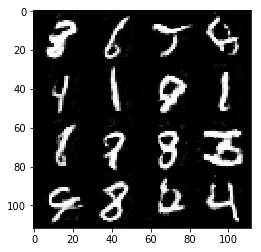

Step : 3810 Epoch 2/2... Discriminator Loss: 0.8645... Generator Loss: 1.2186
Step : 3820 Epoch 2/2... Discriminator Loss: 0.9790... Generator Loss: 1.1265
Step : 3830 Epoch 2/2... Discriminator Loss: 1.0326... Generator Loss: 0.8652
Step : 3840 Epoch 2/2... Discriminator Loss: 0.8147... Generator Loss: 1.2267
Step : 3850 Epoch 2/2... Discriminator Loss: 1.2312... Generator Loss: 0.6330
Step : 3860 Epoch 2/2... Discriminator Loss: 0.8393... Generator Loss: 1.9373
Step : 3870 Epoch 2/2... Discriminator Loss: 0.8125... Generator Loss: 1.8259
Step : 3880 Epoch 2/2... Discriminator Loss: 0.7204... Generator Loss: 1.3686
Step : 3890 Epoch 2/2... Discriminator Loss: 1.0263... Generator Loss: 1.8682
Step : 3900 Epoch 2/2... Discriminator Loss: 0.7679... Generator Loss: 1.4277


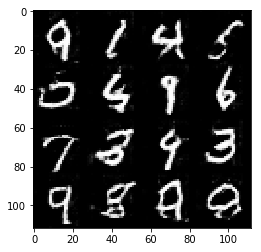

Step : 3910 Epoch 2/2... Discriminator Loss: 0.7923... Generator Loss: 1.3142
Step : 3920 Epoch 2/2... Discriminator Loss: 0.7732... Generator Loss: 1.2238
Step : 3930 Epoch 2/2... Discriminator Loss: 0.9230... Generator Loss: 1.0873
Step : 3940 Epoch 2/2... Discriminator Loss: 0.8455... Generator Loss: 1.4904
Step : 3950 Epoch 2/2... Discriminator Loss: 1.3018... Generator Loss: 0.5818
Step : 3960 Epoch 2/2... Discriminator Loss: 0.8074... Generator Loss: 1.4467
Step : 3970 Epoch 2/2... Discriminator Loss: 1.0516... Generator Loss: 0.8626
Step : 3980 Epoch 2/2... Discriminator Loss: 1.0425... Generator Loss: 0.8564
Step : 3990 Epoch 2/2... Discriminator Loss: 1.3820... Generator Loss: 1.2795
Step : 4000 Epoch 2/2... Discriminator Loss: 0.8884... Generator Loss: 1.1825


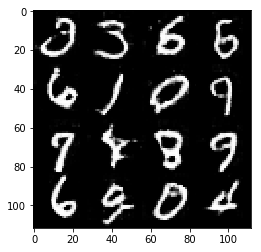

Step : 4010 Epoch 2/2... Discriminator Loss: 1.1092... Generator Loss: 0.7676
Step : 4020 Epoch 2/2... Discriminator Loss: 0.9295... Generator Loss: 0.9595
Step : 4030 Epoch 2/2... Discriminator Loss: 0.8434... Generator Loss: 1.3066
Step : 4040 Epoch 2/2... Discriminator Loss: 1.0125... Generator Loss: 1.5728
Step : 4050 Epoch 2/2... Discriminator Loss: 1.2365... Generator Loss: 0.6191
Step : 4060 Epoch 2/2... Discriminator Loss: 0.8585... Generator Loss: 1.0872
Step : 4070 Epoch 2/2... Discriminator Loss: 0.7370... Generator Loss: 2.0450
Step : 4080 Epoch 2/2... Discriminator Loss: 1.8095... Generator Loss: 0.3265
Step : 4090 Epoch 2/2... Discriminator Loss: 0.8147... Generator Loss: 1.1321
Step : 4100 Epoch 2/2... Discriminator Loss: 0.7395... Generator Loss: 1.5172


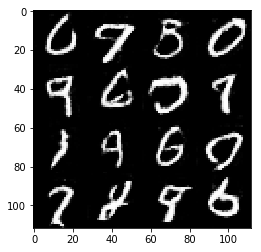

Step : 4110 Epoch 2/2... Discriminator Loss: 0.4455... Generator Loss: 2.5947
Step : 4120 Epoch 2/2... Discriminator Loss: 1.1402... Generator Loss: 0.8877
Step : 4130 Epoch 2/2... Discriminator Loss: 1.3923... Generator Loss: 0.4885
Step : 4140 Epoch 2/2... Discriminator Loss: 0.9149... Generator Loss: 1.4092
Step : 4150 Epoch 2/2... Discriminator Loss: 1.1134... Generator Loss: 0.7491
Step : 4160 Epoch 2/2... Discriminator Loss: 0.9332... Generator Loss: 1.4155
Step : 4170 Epoch 2/2... Discriminator Loss: 0.6553... Generator Loss: 1.6258
Step : 4180 Epoch 2/2... Discriminator Loss: 0.8347... Generator Loss: 1.3329
Step : 4190 Epoch 2/2... Discriminator Loss: 0.8088... Generator Loss: 1.3373
Step : 4200 Epoch 2/2... Discriminator Loss: 1.0505... Generator Loss: 0.7900


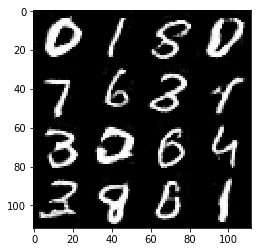

Step : 4210 Epoch 2/2... Discriminator Loss: 0.9069... Generator Loss: 0.9560
Step : 4220 Epoch 2/2... Discriminator Loss: 1.1222... Generator Loss: 0.7626
Step : 4230 Epoch 2/2... Discriminator Loss: 0.8066... Generator Loss: 1.2643
Step : 4240 Epoch 2/2... Discriminator Loss: 0.8462... Generator Loss: 1.1347
Step : 4250 Epoch 2/2... Discriminator Loss: 0.7697... Generator Loss: 1.3393
Step : 4260 Epoch 2/2... Discriminator Loss: 0.8769... Generator Loss: 1.2992
Step : 4270 Epoch 2/2... Discriminator Loss: 0.7444... Generator Loss: 1.2878
Step : 4280 Epoch 2/2... Discriminator Loss: 1.0617... Generator Loss: 0.7488
MNIST Complete


In [25]:
batch_size = 28
z_dim = 50
learning_rate = 0.0001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
#mnist_images_2 = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'RGB')
#pyplot.imshow(helper.images_square_grid(mnist_images_2[:25], 'RGB'))

print(mnist_dataset.shape,mnist_dataset.image_mode )
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)
    
print("MNIST Complete")    

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Step : 10 Epoch 1/1... Discriminator Loss: 0.4334... Generator Loss: 3.1722
Step : 20 Epoch 1/1... Discriminator Loss: 0.5450... Generator Loss: 11.8285
Step : 30 Epoch 1/1... Discriminator Loss: 0.3962... Generator Loss: 3.1544
Step : 40 Epoch 1/1... Discriminator Loss: 0.4335... Generator Loss: 6.8734
Step : 50 Epoch 1/1... Discriminator Loss: 1.3839... Generator Loss: 0.9763
Step : 60 Epoch 1/1... Discriminator Loss: 1.3531... Generator Loss: 3.3534
Step : 70 Epoch 1/1... Discriminator Loss: 0.9413... Generator Loss: 4.1396
Step : 80 Epoch 1/1... Discriminator Loss: 0.7652... Generator Loss: 1.5799
Step : 90 Epoch 1/1... Discriminator Loss: 0.5708... Generator Loss: 3.1448
Step : 100 Epoch 1/1... Discriminator Loss: 0.4431... Generator Loss: 3.1399


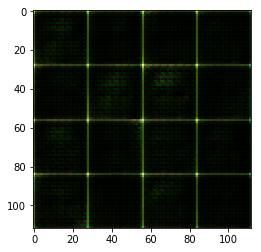

Step : 110 Epoch 1/1... Discriminator Loss: 0.5139... Generator Loss: 2.2756
Step : 120 Epoch 1/1... Discriminator Loss: 0.6259... Generator Loss: 3.2839
Step : 130 Epoch 1/1... Discriminator Loss: 0.7255... Generator Loss: 2.8293
Step : 140 Epoch 1/1... Discriminator Loss: 0.6621... Generator Loss: 3.9484
Step : 150 Epoch 1/1... Discriminator Loss: 1.2371... Generator Loss: 0.8934
Step : 160 Epoch 1/1... Discriminator Loss: 0.6421... Generator Loss: 1.9695
Step : 170 Epoch 1/1... Discriminator Loss: 1.6907... Generator Loss: 4.7028
Step : 180 Epoch 1/1... Discriminator Loss: 1.4463... Generator Loss: 0.7313
Step : 190 Epoch 1/1... Discriminator Loss: 1.0668... Generator Loss: 0.9062
Step : 200 Epoch 1/1... Discriminator Loss: 1.2434... Generator Loss: 0.7705


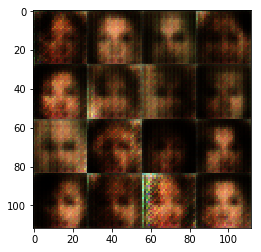

Step : 210 Epoch 1/1... Discriminator Loss: 1.5100... Generator Loss: 3.1480
Step : 220 Epoch 1/1... Discriminator Loss: 1.6925... Generator Loss: 4.0835
Step : 230 Epoch 1/1... Discriminator Loss: 1.4237... Generator Loss: 0.5663
Step : 240 Epoch 1/1... Discriminator Loss: 1.2081... Generator Loss: 1.9639
Step : 250 Epoch 1/1... Discriminator Loss: 1.3305... Generator Loss: 0.9354
Step : 260 Epoch 1/1... Discriminator Loss: 1.0713... Generator Loss: 0.9420
Step : 270 Epoch 1/1... Discriminator Loss: 0.9358... Generator Loss: 1.7335
Step : 280 Epoch 1/1... Discriminator Loss: 1.4108... Generator Loss: 0.5047
Step : 290 Epoch 1/1... Discriminator Loss: 1.3314... Generator Loss: 0.6279
Step : 300 Epoch 1/1... Discriminator Loss: 1.3586... Generator Loss: 0.7481


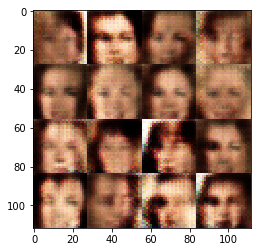

Step : 310 Epoch 1/1... Discriminator Loss: 0.8224... Generator Loss: 2.3140
Step : 320 Epoch 1/1... Discriminator Loss: 1.1828... Generator Loss: 0.7449
Step : 330 Epoch 1/1... Discriminator Loss: 2.6452... Generator Loss: 0.1294
Step : 340 Epoch 1/1... Discriminator Loss: 0.9805... Generator Loss: 1.2073
Step : 350 Epoch 1/1... Discriminator Loss: 0.8046... Generator Loss: 2.4153
Step : 360 Epoch 1/1... Discriminator Loss: 1.2265... Generator Loss: 0.9425
Step : 370 Epoch 1/1... Discriminator Loss: 1.2956... Generator Loss: 0.8481
Step : 380 Epoch 1/1... Discriminator Loss: 1.0753... Generator Loss: 0.8857
Step : 390 Epoch 1/1... Discriminator Loss: 1.2657... Generator Loss: 1.2175
Step : 400 Epoch 1/1... Discriminator Loss: 1.6612... Generator Loss: 0.5460


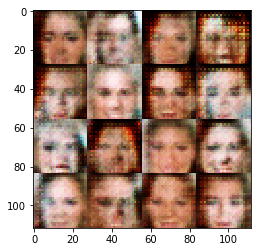

Step : 410 Epoch 1/1... Discriminator Loss: 1.3742... Generator Loss: 0.8404
Step : 420 Epoch 1/1... Discriminator Loss: 1.5771... Generator Loss: 0.6861
Step : 430 Epoch 1/1... Discriminator Loss: 1.1797... Generator Loss: 1.0864
Step : 440 Epoch 1/1... Discriminator Loss: 1.0838... Generator Loss: 1.5861
Step : 450 Epoch 1/1... Discriminator Loss: 1.2036... Generator Loss: 2.9665
Step : 460 Epoch 1/1... Discriminator Loss: 1.4024... Generator Loss: 0.8147
Step : 470 Epoch 1/1... Discriminator Loss: 1.7272... Generator Loss: 0.3406
Step : 480 Epoch 1/1... Discriminator Loss: 0.8029... Generator Loss: 1.2399
Step : 490 Epoch 1/1... Discriminator Loss: 1.3743... Generator Loss: 0.7938
Step : 500 Epoch 1/1... Discriminator Loss: 1.2110... Generator Loss: 0.8072


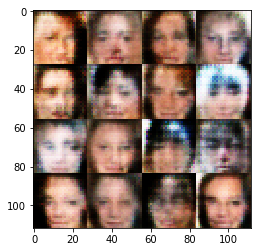

Step : 510 Epoch 1/1... Discriminator Loss: 1.2539... Generator Loss: 1.3265
Step : 520 Epoch 1/1... Discriminator Loss: 1.1661... Generator Loss: 0.7229
Step : 530 Epoch 1/1... Discriminator Loss: 1.8798... Generator Loss: 2.3453
Step : 540 Epoch 1/1... Discriminator Loss: 0.6017... Generator Loss: 2.2240
Step : 550 Epoch 1/1... Discriminator Loss: 1.3805... Generator Loss: 0.4968
Step : 560 Epoch 1/1... Discriminator Loss: 1.2841... Generator Loss: 0.9752
Step : 570 Epoch 1/1... Discriminator Loss: 1.8214... Generator Loss: 2.1060
Step : 580 Epoch 1/1... Discriminator Loss: 1.0349... Generator Loss: 1.3810
Step : 590 Epoch 1/1... Discriminator Loss: 1.5126... Generator Loss: 0.4884
Step : 600 Epoch 1/1... Discriminator Loss: 1.3080... Generator Loss: 0.7371


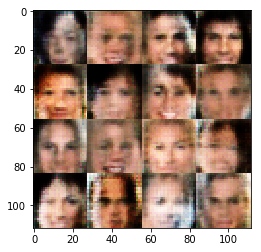

Step : 610 Epoch 1/1... Discriminator Loss: 1.5318... Generator Loss: 1.0679
Step : 620 Epoch 1/1... Discriminator Loss: 0.9680... Generator Loss: 1.3772
Step : 630 Epoch 1/1... Discriminator Loss: 1.1209... Generator Loss: 0.9950
Step : 640 Epoch 1/1... Discriminator Loss: 1.5918... Generator Loss: 0.4154
Step : 650 Epoch 1/1... Discriminator Loss: 1.1535... Generator Loss: 0.7954
Step : 660 Epoch 1/1... Discriminator Loss: 1.4530... Generator Loss: 0.8554
Step : 670 Epoch 1/1... Discriminator Loss: 1.0297... Generator Loss: 1.1888
Step : 680 Epoch 1/1... Discriminator Loss: 1.2012... Generator Loss: 0.9508
Step : 690 Epoch 1/1... Discriminator Loss: 1.4202... Generator Loss: 0.4621
Step : 700 Epoch 1/1... Discriminator Loss: 1.8259... Generator Loss: 2.1987


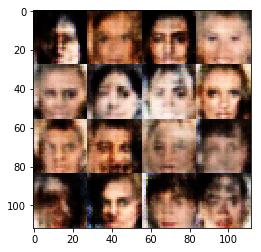

Step : 710 Epoch 1/1... Discriminator Loss: 1.4188... Generator Loss: 0.7518
Step : 720 Epoch 1/1... Discriminator Loss: 1.3009... Generator Loss: 2.0385
Step : 730 Epoch 1/1... Discriminator Loss: 0.9785... Generator Loss: 0.9969
Step : 740 Epoch 1/1... Discriminator Loss: 1.4316... Generator Loss: 0.6419
Step : 750 Epoch 1/1... Discriminator Loss: 1.1735... Generator Loss: 0.9768
Step : 760 Epoch 1/1... Discriminator Loss: 1.2522... Generator Loss: 0.7779
Step : 770 Epoch 1/1... Discriminator Loss: 1.1724... Generator Loss: 0.7616
Step : 780 Epoch 1/1... Discriminator Loss: 1.3862... Generator Loss: 0.7027
Step : 790 Epoch 1/1... Discriminator Loss: 0.9784... Generator Loss: 1.2291
Step : 800 Epoch 1/1... Discriminator Loss: 1.5258... Generator Loss: 0.9165


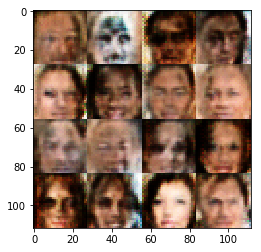

Step : 810 Epoch 1/1... Discriminator Loss: 1.4929... Generator Loss: 0.4399
Step : 820 Epoch 1/1... Discriminator Loss: 1.1694... Generator Loss: 0.8092
Step : 830 Epoch 1/1... Discriminator Loss: 1.7317... Generator Loss: 0.3307
Step : 840 Epoch 1/1... Discriminator Loss: 1.3084... Generator Loss: 1.4597
Step : 850 Epoch 1/1... Discriminator Loss: 1.4799... Generator Loss: 1.0088
Step : 860 Epoch 1/1... Discriminator Loss: 1.1960... Generator Loss: 0.8688
Step : 870 Epoch 1/1... Discriminator Loss: 1.3348... Generator Loss: 0.9212
Step : 880 Epoch 1/1... Discriminator Loss: 1.1459... Generator Loss: 0.9426
Step : 890 Epoch 1/1... Discriminator Loss: 1.4469... Generator Loss: 0.4912
Step : 900 Epoch 1/1... Discriminator Loss: 1.7837... Generator Loss: 0.3236


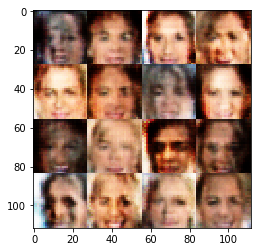

Step : 910 Epoch 1/1... Discriminator Loss: 1.4171... Generator Loss: 0.4766
Step : 920 Epoch 1/1... Discriminator Loss: 1.4343... Generator Loss: 0.6248
Step : 930 Epoch 1/1... Discriminator Loss: 1.1461... Generator Loss: 1.1455
Step : 940 Epoch 1/1... Discriminator Loss: 1.3399... Generator Loss: 0.5850
Step : 950 Epoch 1/1... Discriminator Loss: 1.2085... Generator Loss: 0.7813
Step : 960 Epoch 1/1... Discriminator Loss: 0.9729... Generator Loss: 1.3769
Step : 970 Epoch 1/1... Discriminator Loss: 1.5730... Generator Loss: 0.4453
Step : 980 Epoch 1/1... Discriminator Loss: 1.5134... Generator Loss: 1.6760
Step : 990 Epoch 1/1... Discriminator Loss: 1.4239... Generator Loss: 1.9512
Step : 1000 Epoch 1/1... Discriminator Loss: 0.6398... Generator Loss: 1.7513


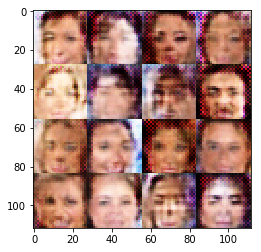

Step : 1010 Epoch 1/1... Discriminator Loss: 1.3321... Generator Loss: 0.7527
Step : 1020 Epoch 1/1... Discriminator Loss: 1.1750... Generator Loss: 1.0123
Step : 1030 Epoch 1/1... Discriminator Loss: 2.4302... Generator Loss: 0.1558
Step : 1040 Epoch 1/1... Discriminator Loss: 1.2756... Generator Loss: 0.7705
Step : 1050 Epoch 1/1... Discriminator Loss: 1.0156... Generator Loss: 0.9553
Step : 1060 Epoch 1/1... Discriminator Loss: 1.4472... Generator Loss: 0.4920
Step : 1070 Epoch 1/1... Discriminator Loss: 1.7443... Generator Loss: 0.3170
Step : 1080 Epoch 1/1... Discriminator Loss: 1.1618... Generator Loss: 0.8864
Step : 1090 Epoch 1/1... Discriminator Loss: 1.5817... Generator Loss: 0.4448
Step : 1100 Epoch 1/1... Discriminator Loss: 1.2382... Generator Loss: 0.8794


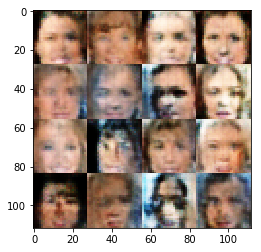

Step : 1110 Epoch 1/1... Discriminator Loss: 1.3042... Generator Loss: 0.5525
Step : 1120 Epoch 1/1... Discriminator Loss: 1.0983... Generator Loss: 1.1821
Step : 1130 Epoch 1/1... Discriminator Loss: 1.2028... Generator Loss: 0.7458
Step : 1140 Epoch 1/1... Discriminator Loss: 1.5170... Generator Loss: 0.4518
Step : 1150 Epoch 1/1... Discriminator Loss: 1.1292... Generator Loss: 1.0817
Step : 1160 Epoch 1/1... Discriminator Loss: 1.9684... Generator Loss: 0.2888
Step : 1170 Epoch 1/1... Discriminator Loss: 1.1908... Generator Loss: 0.6911
Step : 1180 Epoch 1/1... Discriminator Loss: 1.1705... Generator Loss: 0.7824
Step : 1190 Epoch 1/1... Discriminator Loss: 1.7526... Generator Loss: 0.3033
Step : 1200 Epoch 1/1... Discriminator Loss: 0.7128... Generator Loss: 1.4505


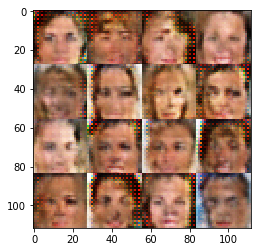

Step : 1210 Epoch 1/1... Discriminator Loss: 1.1266... Generator Loss: 0.9658
Step : 1220 Epoch 1/1... Discriminator Loss: 1.0555... Generator Loss: 0.8325
Step : 1230 Epoch 1/1... Discriminator Loss: 1.4395... Generator Loss: 0.5714
Step : 1240 Epoch 1/1... Discriminator Loss: 1.4686... Generator Loss: 0.8211
Step : 1250 Epoch 1/1... Discriminator Loss: 1.4139... Generator Loss: 1.3205
Step : 1260 Epoch 1/1... Discriminator Loss: 1.0309... Generator Loss: 1.0540
Step : 1270 Epoch 1/1... Discriminator Loss: 1.3742... Generator Loss: 1.7748
Step : 1280 Epoch 1/1... Discriminator Loss: 1.9686... Generator Loss: 0.2523
Step : 1290 Epoch 1/1... Discriminator Loss: 1.1254... Generator Loss: 0.9172
Step : 1300 Epoch 1/1... Discriminator Loss: 1.0471... Generator Loss: 0.8271


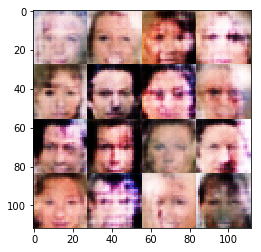

Step : 1310 Epoch 1/1... Discriminator Loss: 0.7917... Generator Loss: 1.5449
Step : 1320 Epoch 1/1... Discriminator Loss: 1.1561... Generator Loss: 0.9800
Step : 1330 Epoch 1/1... Discriminator Loss: 1.0988... Generator Loss: 1.4353
Step : 1340 Epoch 1/1... Discriminator Loss: 1.2189... Generator Loss: 0.7626
Step : 1350 Epoch 1/1... Discriminator Loss: 1.3128... Generator Loss: 1.6655
Step : 1360 Epoch 1/1... Discriminator Loss: 0.9615... Generator Loss: 1.4741
Step : 1370 Epoch 1/1... Discriminator Loss: 1.0046... Generator Loss: 1.1577
Step : 1380 Epoch 1/1... Discriminator Loss: 1.6267... Generator Loss: 0.3727
Step : 1390 Epoch 1/1... Discriminator Loss: 1.3199... Generator Loss: 1.6366
Step : 1400 Epoch 1/1... Discriminator Loss: 1.2817... Generator Loss: 1.3999


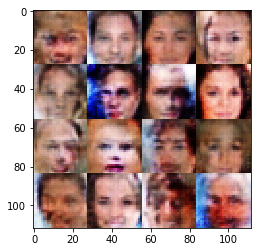

Step : 1410 Epoch 1/1... Discriminator Loss: 1.1122... Generator Loss: 1.1034
Step : 1420 Epoch 1/1... Discriminator Loss: 1.3976... Generator Loss: 0.4858
Step : 1430 Epoch 1/1... Discriminator Loss: 0.9310... Generator Loss: 1.1484
Step : 1440 Epoch 1/1... Discriminator Loss: 1.2887... Generator Loss: 0.7013
Step : 1450 Epoch 1/1... Discriminator Loss: 1.4384... Generator Loss: 0.5414
Step : 1460 Epoch 1/1... Discriminator Loss: 1.1133... Generator Loss: 1.3919
Step : 1470 Epoch 1/1... Discriminator Loss: 0.6869... Generator Loss: 1.9900
Step : 1480 Epoch 1/1... Discriminator Loss: 1.3207... Generator Loss: 1.2728
Step : 1490 Epoch 1/1... Discriminator Loss: 0.8456... Generator Loss: 1.2420
Step : 1500 Epoch 1/1... Discriminator Loss: 1.5753... Generator Loss: 0.3760


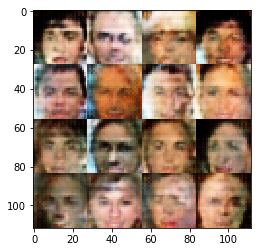

Step : 1510 Epoch 1/1... Discriminator Loss: 1.3512... Generator Loss: 1.0738
Step : 1520 Epoch 1/1... Discriminator Loss: 1.9155... Generator Loss: 0.2499
Step : 1530 Epoch 1/1... Discriminator Loss: 1.5738... Generator Loss: 0.3978
Step : 1540 Epoch 1/1... Discriminator Loss: 1.3590... Generator Loss: 0.9375
Step : 1550 Epoch 1/1... Discriminator Loss: 1.1834... Generator Loss: 0.9528
Step : 1560 Epoch 1/1... Discriminator Loss: 0.9834... Generator Loss: 1.0228
Step : 1570 Epoch 1/1... Discriminator Loss: 1.1380... Generator Loss: 1.0509
Step : 1580 Epoch 1/1... Discriminator Loss: 2.3452... Generator Loss: 0.5004
Step : 1590 Epoch 1/1... Discriminator Loss: 1.3429... Generator Loss: 0.8939
Step : 1600 Epoch 1/1... Discriminator Loss: 1.2122... Generator Loss: 1.0571


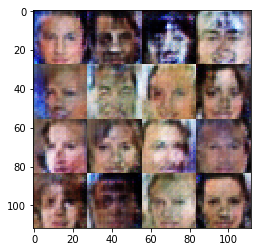

Step : 1610 Epoch 1/1... Discriminator Loss: 1.1937... Generator Loss: 1.1407
Step : 1620 Epoch 1/1... Discriminator Loss: 1.2086... Generator Loss: 0.7974
Step : 1630 Epoch 1/1... Discriminator Loss: 1.2369... Generator Loss: 0.9473
Step : 1640 Epoch 1/1... Discriminator Loss: 1.2748... Generator Loss: 0.7115
Step : 1650 Epoch 1/1... Discriminator Loss: 1.3715... Generator Loss: 0.6901
Step : 1660 Epoch 1/1... Discriminator Loss: 1.4610... Generator Loss: 0.5849
Step : 1670 Epoch 1/1... Discriminator Loss: 1.4770... Generator Loss: 0.5460
Step : 1680 Epoch 1/1... Discriminator Loss: 1.0270... Generator Loss: 1.5742
Step : 1690 Epoch 1/1... Discriminator Loss: 1.0732... Generator Loss: 0.7564
Step : 1700 Epoch 1/1... Discriminator Loss: 1.2909... Generator Loss: 1.1553


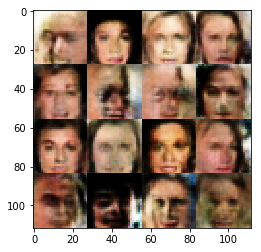

Step : 1710 Epoch 1/1... Discriminator Loss: 1.1242... Generator Loss: 2.1685
Step : 1720 Epoch 1/1... Discriminator Loss: 1.5077... Generator Loss: 1.0670
Step : 1730 Epoch 1/1... Discriminator Loss: 1.1765... Generator Loss: 0.8785
Step : 1740 Epoch 1/1... Discriminator Loss: 1.1711... Generator Loss: 1.0376
Step : 1750 Epoch 1/1... Discriminator Loss: 1.1989... Generator Loss: 0.9152
Step : 1760 Epoch 1/1... Discriminator Loss: 1.2078... Generator Loss: 0.8391
Step : 1770 Epoch 1/1... Discriminator Loss: 0.6883... Generator Loss: 1.5125
Step : 1780 Epoch 1/1... Discriminator Loss: 2.0859... Generator Loss: 0.2130
Step : 1790 Epoch 1/1... Discriminator Loss: 1.1608... Generator Loss: 0.7590
Step : 1800 Epoch 1/1... Discriminator Loss: 1.0013... Generator Loss: 1.1586


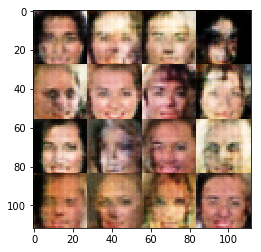

Step : 1810 Epoch 1/1... Discriminator Loss: 1.2879... Generator Loss: 0.5716
Step : 1820 Epoch 1/1... Discriminator Loss: 1.0770... Generator Loss: 0.9191
Step : 1830 Epoch 1/1... Discriminator Loss: 0.6271... Generator Loss: 1.8961
Step : 1840 Epoch 1/1... Discriminator Loss: 1.2922... Generator Loss: 0.6346
Step : 1850 Epoch 1/1... Discriminator Loss: 1.3632... Generator Loss: 0.5806
Step : 1860 Epoch 1/1... Discriminator Loss: 1.1942... Generator Loss: 0.8410
Step : 1870 Epoch 1/1... Discriminator Loss: 2.0007... Generator Loss: 0.2290
Step : 1880 Epoch 1/1... Discriminator Loss: 1.0032... Generator Loss: 0.9636
Step : 1890 Epoch 1/1... Discriminator Loss: 1.0001... Generator Loss: 0.9786
Step : 1900 Epoch 1/1... Discriminator Loss: 1.8982... Generator Loss: 0.2733


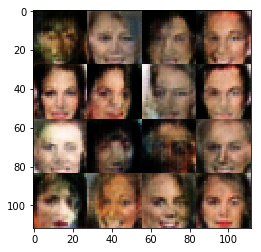

Step : 1910 Epoch 1/1... Discriminator Loss: 0.7649... Generator Loss: 1.7015
Step : 1920 Epoch 1/1... Discriminator Loss: 1.3764... Generator Loss: 0.5455
Step : 1930 Epoch 1/1... Discriminator Loss: 1.2318... Generator Loss: 1.0463
Step : 1940 Epoch 1/1... Discriminator Loss: 1.1370... Generator Loss: 1.2353
Step : 1950 Epoch 1/1... Discriminator Loss: 1.2856... Generator Loss: 0.6690
Step : 1960 Epoch 1/1... Discriminator Loss: 1.3613... Generator Loss: 0.5124
Step : 1970 Epoch 1/1... Discriminator Loss: 2.2979... Generator Loss: 0.1735
Step : 1980 Epoch 1/1... Discriminator Loss: 1.2770... Generator Loss: 1.0560
Step : 1990 Epoch 1/1... Discriminator Loss: 1.0946... Generator Loss: 0.8892
Step : 2000 Epoch 1/1... Discriminator Loss: 1.2176... Generator Loss: 0.7740


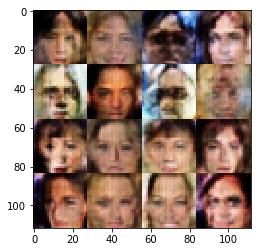

Step : 2010 Epoch 1/1... Discriminator Loss: 1.2782... Generator Loss: 0.7493
Step : 2020 Epoch 1/1... Discriminator Loss: 1.3433... Generator Loss: 0.5178
Step : 2030 Epoch 1/1... Discriminator Loss: 1.0306... Generator Loss: 1.0033
Step : 2040 Epoch 1/1... Discriminator Loss: 1.2965... Generator Loss: 0.5736
Step : 2050 Epoch 1/1... Discriminator Loss: 1.2293... Generator Loss: 0.7741
Step : 2060 Epoch 1/1... Discriminator Loss: 1.7959... Generator Loss: 0.3281
Step : 2070 Epoch 1/1... Discriminator Loss: 1.1141... Generator Loss: 0.7846
Step : 2080 Epoch 1/1... Discriminator Loss: 1.0828... Generator Loss: 0.8926
Step : 2090 Epoch 1/1... Discriminator Loss: 1.4443... Generator Loss: 1.7319
Step : 2100 Epoch 1/1... Discriminator Loss: 1.1032... Generator Loss: 0.7601


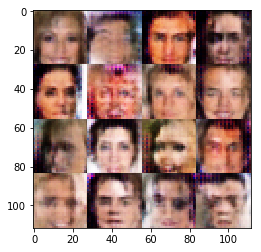

Step : 2110 Epoch 1/1... Discriminator Loss: 1.1994... Generator Loss: 0.7481
Step : 2120 Epoch 1/1... Discriminator Loss: 1.2511... Generator Loss: 1.9426
Step : 2130 Epoch 1/1... Discriminator Loss: 0.5170... Generator Loss: 2.3310
Step : 2140 Epoch 1/1... Discriminator Loss: 1.2149... Generator Loss: 0.7728
Step : 2150 Epoch 1/1... Discriminator Loss: 1.6258... Generator Loss: 0.4374
Step : 2160 Epoch 1/1... Discriminator Loss: 0.8341... Generator Loss: 2.1555
Step : 2170 Epoch 1/1... Discriminator Loss: 1.0759... Generator Loss: 0.8645
Step : 2180 Epoch 1/1... Discriminator Loss: 1.5194... Generator Loss: 0.4438
Step : 2190 Epoch 1/1... Discriminator Loss: 1.2685... Generator Loss: 0.8724
Step : 2200 Epoch 1/1... Discriminator Loss: 1.3906... Generator Loss: 0.5061


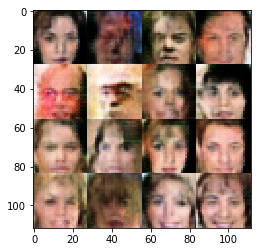

Step : 2210 Epoch 1/1... Discriminator Loss: 1.1785... Generator Loss: 0.7361
Step : 2220 Epoch 1/1... Discriminator Loss: 1.3799... Generator Loss: 0.6819
Step : 2230 Epoch 1/1... Discriminator Loss: 1.4319... Generator Loss: 0.7064
Step : 2240 Epoch 1/1... Discriminator Loss: 1.1116... Generator Loss: 0.8266
Step : 2250 Epoch 1/1... Discriminator Loss: 1.2593... Generator Loss: 0.6298
Step : 2260 Epoch 1/1... Discriminator Loss: 1.2789... Generator Loss: 0.6449
Step : 2270 Epoch 1/1... Discriminator Loss: 1.3626... Generator Loss: 0.6367
Step : 2280 Epoch 1/1... Discriminator Loss: 1.0632... Generator Loss: 1.2765
Step : 2290 Epoch 1/1... Discriminator Loss: 1.2891... Generator Loss: 0.7374
Step : 2300 Epoch 1/1... Discriminator Loss: 0.7113... Generator Loss: 2.2460


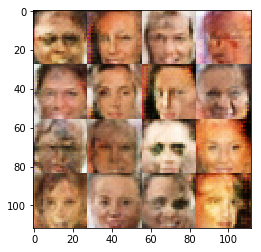

Step : 2310 Epoch 1/1... Discriminator Loss: 1.4173... Generator Loss: 1.1481
Step : 2320 Epoch 1/1... Discriminator Loss: 1.3593... Generator Loss: 0.6372
Step : 2330 Epoch 1/1... Discriminator Loss: 1.2309... Generator Loss: 0.6688
Step : 2340 Epoch 1/1... Discriminator Loss: 1.5885... Generator Loss: 0.4238
Step : 2350 Epoch 1/1... Discriminator Loss: 1.3302... Generator Loss: 0.6190
Step : 2360 Epoch 1/1... Discriminator Loss: 1.0724... Generator Loss: 1.0975
Step : 2370 Epoch 1/1... Discriminator Loss: 1.2894... Generator Loss: 0.9919
Step : 2380 Epoch 1/1... Discriminator Loss: 1.1656... Generator Loss: 1.0524
Step : 2390 Epoch 1/1... Discriminator Loss: 1.6121... Generator Loss: 0.4019
Step : 2400 Epoch 1/1... Discriminator Loss: 1.3108... Generator Loss: 0.8042


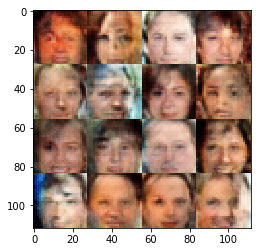

Step : 2410 Epoch 1/1... Discriminator Loss: 1.0727... Generator Loss: 0.9214
Step : 2420 Epoch 1/1... Discriminator Loss: 1.5858... Generator Loss: 0.5214
Step : 2430 Epoch 1/1... Discriminator Loss: 1.1876... Generator Loss: 0.6408
Step : 2440 Epoch 1/1... Discriminator Loss: 1.5007... Generator Loss: 0.4827
Step : 2450 Epoch 1/1... Discriminator Loss: 1.4707... Generator Loss: 0.5198
Step : 2460 Epoch 1/1... Discriminator Loss: 1.3317... Generator Loss: 1.7613
Step : 2470 Epoch 1/1... Discriminator Loss: 1.0167... Generator Loss: 1.0909
Step : 2480 Epoch 1/1... Discriminator Loss: 1.4828... Generator Loss: 0.4637
Step : 2490 Epoch 1/1... Discriminator Loss: 1.2434... Generator Loss: 0.6635
Step : 2500 Epoch 1/1... Discriminator Loss: 1.2200... Generator Loss: 0.8127


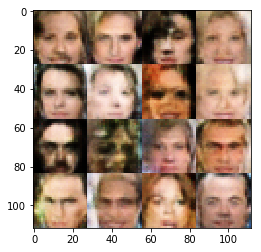

Step : 2510 Epoch 1/1... Discriminator Loss: 1.4409... Generator Loss: 0.6380
Step : 2520 Epoch 1/1... Discriminator Loss: 1.1239... Generator Loss: 0.8733
Step : 2530 Epoch 1/1... Discriminator Loss: 1.0560... Generator Loss: 0.9054
Step : 2540 Epoch 1/1... Discriminator Loss: 1.6026... Generator Loss: 0.3649
Step : 2550 Epoch 1/1... Discriminator Loss: 1.4923... Generator Loss: 0.7674
Step : 2560 Epoch 1/1... Discriminator Loss: 0.9881... Generator Loss: 1.0952
Step : 2570 Epoch 1/1... Discriminator Loss: 1.2410... Generator Loss: 0.7239
Step : 2580 Epoch 1/1... Discriminator Loss: 1.4884... Generator Loss: 0.4457
Step : 2590 Epoch 1/1... Discriminator Loss: 2.1423... Generator Loss: 0.2005
Step : 2600 Epoch 1/1... Discriminator Loss: 1.3652... Generator Loss: 0.9135


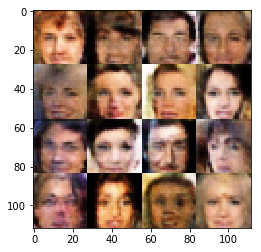

Step : 2610 Epoch 1/1... Discriminator Loss: 1.3433... Generator Loss: 0.6919
Step : 2620 Epoch 1/1... Discriminator Loss: 1.2883... Generator Loss: 0.9629
Step : 2630 Epoch 1/1... Discriminator Loss: 1.0900... Generator Loss: 1.1370
Step : 2640 Epoch 1/1... Discriminator Loss: 1.4103... Generator Loss: 0.7434
Step : 2650 Epoch 1/1... Discriminator Loss: 1.2110... Generator Loss: 0.9799
Step : 2660 Epoch 1/1... Discriminator Loss: 1.2092... Generator Loss: 0.7464
Step : 2670 Epoch 1/1... Discriminator Loss: 1.2590... Generator Loss: 0.7117
Step : 2680 Epoch 1/1... Discriminator Loss: 1.3137... Generator Loss: 0.5609
Step : 2690 Epoch 1/1... Discriminator Loss: 1.7375... Generator Loss: 0.3127
Step : 2700 Epoch 1/1... Discriminator Loss: 1.2595... Generator Loss: 1.0926


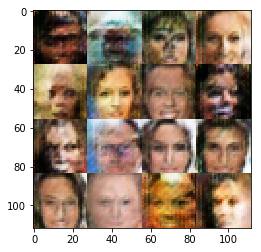

Step : 2710 Epoch 1/1... Discriminator Loss: 1.1786... Generator Loss: 0.8617
Step : 2720 Epoch 1/1... Discriminator Loss: 1.5026... Generator Loss: 1.5060
Step : 2730 Epoch 1/1... Discriminator Loss: 1.0682... Generator Loss: 1.4445
Step : 2740 Epoch 1/1... Discriminator Loss: 1.3675... Generator Loss: 0.5689
Step : 2750 Epoch 1/1... Discriminator Loss: 1.5214... Generator Loss: 0.4360
Step : 2760 Epoch 1/1... Discriminator Loss: 1.2714... Generator Loss: 1.6339
Step : 2770 Epoch 1/1... Discriminator Loss: 0.9414... Generator Loss: 1.1379
Step : 2780 Epoch 1/1... Discriminator Loss: 1.2483... Generator Loss: 1.2030
Step : 2790 Epoch 1/1... Discriminator Loss: 1.0463... Generator Loss: 1.0787
Step : 2800 Epoch 1/1... Discriminator Loss: 1.4277... Generator Loss: 0.6819


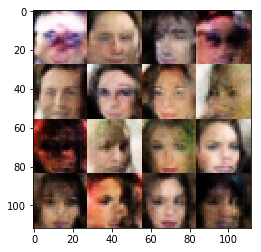

Step : 2810 Epoch 1/1... Discriminator Loss: 1.3467... Generator Loss: 0.5047
Step : 2820 Epoch 1/1... Discriminator Loss: 0.7253... Generator Loss: 2.9323
Step : 2830 Epoch 1/1... Discriminator Loss: 1.4530... Generator Loss: 0.6764
Step : 2840 Epoch 1/1... Discriminator Loss: 1.0050... Generator Loss: 1.1021
Step : 2850 Epoch 1/1... Discriminator Loss: 1.4476... Generator Loss: 0.6290
Step : 2860 Epoch 1/1... Discriminator Loss: 1.5757... Generator Loss: 0.4091
Step : 2870 Epoch 1/1... Discriminator Loss: 0.9909... Generator Loss: 0.8195
Step : 2880 Epoch 1/1... Discriminator Loss: 1.4517... Generator Loss: 0.6449
Step : 2890 Epoch 1/1... Discriminator Loss: 1.0327... Generator Loss: 1.6219
Step : 2900 Epoch 1/1... Discriminator Loss: 1.2425... Generator Loss: 0.8057


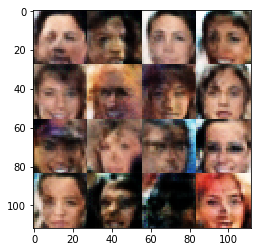

Step : 2910 Epoch 1/1... Discriminator Loss: 1.2787... Generator Loss: 0.8260
Step : 2920 Epoch 1/1... Discriminator Loss: 1.5362... Generator Loss: 0.5107
Step : 2930 Epoch 1/1... Discriminator Loss: 0.7871... Generator Loss: 1.1592
Step : 2940 Epoch 1/1... Discriminator Loss: 1.1942... Generator Loss: 0.9554
Step : 2950 Epoch 1/1... Discriminator Loss: 1.3833... Generator Loss: 0.6415
Step : 2960 Epoch 1/1... Discriminator Loss: 1.0232... Generator Loss: 0.9791
Step : 2970 Epoch 1/1... Discriminator Loss: 1.1398... Generator Loss: 0.8491
Step : 2980 Epoch 1/1... Discriminator Loss: 1.5405... Generator Loss: 0.4259
Step : 2990 Epoch 1/1... Discriminator Loss: 1.3951... Generator Loss: 0.4979
Step : 3000 Epoch 1/1... Discriminator Loss: 1.2773... Generator Loss: 0.7388


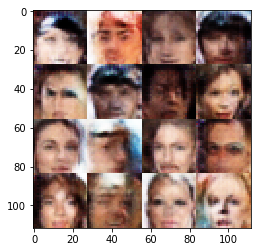

Step : 3010 Epoch 1/1... Discriminator Loss: 1.3540... Generator Loss: 0.7234
Step : 3020 Epoch 1/1... Discriminator Loss: 1.1734... Generator Loss: 0.9981
Step : 3030 Epoch 1/1... Discriminator Loss: 1.3423... Generator Loss: 1.6208
Step : 3040 Epoch 1/1... Discriminator Loss: 1.0308... Generator Loss: 1.1727
Step : 3050 Epoch 1/1... Discriminator Loss: 1.5790... Generator Loss: 0.4101
Step : 3060 Epoch 1/1... Discriminator Loss: 1.1707... Generator Loss: 0.8924
Step : 3070 Epoch 1/1... Discriminator Loss: 1.5783... Generator Loss: 0.4689
Step : 3080 Epoch 1/1... Discriminator Loss: 1.4448... Generator Loss: 0.5446
Step : 3090 Epoch 1/1... Discriminator Loss: 1.0697... Generator Loss: 0.7821
Step : 3100 Epoch 1/1... Discriminator Loss: 1.2117... Generator Loss: 0.7393


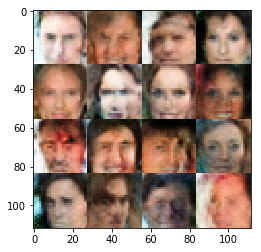

Step : 3110 Epoch 1/1... Discriminator Loss: 1.2633... Generator Loss: 0.8449
Step : 3120 Epoch 1/1... Discriminator Loss: 1.2467... Generator Loss: 0.7768
Step : 3130 Epoch 1/1... Discriminator Loss: 1.1321... Generator Loss: 1.0504
Step : 3140 Epoch 1/1... Discriminator Loss: 1.7137... Generator Loss: 0.3530
Step : 3150 Epoch 1/1... Discriminator Loss: 1.4216... Generator Loss: 0.6450
Step : 3160 Epoch 1/1... Discriminator Loss: 1.4139... Generator Loss: 0.5948
Step : 3170 Epoch 1/1... Discriminator Loss: 1.5335... Generator Loss: 0.4495
Step : 3180 Epoch 1/1... Discriminator Loss: 1.2877... Generator Loss: 0.9612
Step : 3190 Epoch 1/1... Discriminator Loss: 1.6695... Generator Loss: 0.3402
Step : 3200 Epoch 1/1... Discriminator Loss: 1.3056... Generator Loss: 0.7506


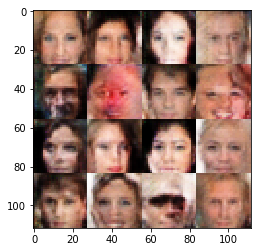

Step : 3210 Epoch 1/1... Discriminator Loss: 1.3681... Generator Loss: 1.0242
Step : 3220 Epoch 1/1... Discriminator Loss: 1.1574... Generator Loss: 0.9056
Step : 3230 Epoch 1/1... Discriminator Loss: 1.1604... Generator Loss: 0.8037
Step : 3240 Epoch 1/1... Discriminator Loss: 1.5691... Generator Loss: 0.4343
Step : 3250 Epoch 1/1... Discriminator Loss: 1.2745... Generator Loss: 0.7805
Step : 3260 Epoch 1/1... Discriminator Loss: 1.1970... Generator Loss: 1.0606
Step : 3270 Epoch 1/1... Discriminator Loss: 1.0631... Generator Loss: 1.1622
Step : 3280 Epoch 1/1... Discriminator Loss: 1.2705... Generator Loss: 0.9300
Step : 3290 Epoch 1/1... Discriminator Loss: 1.4116... Generator Loss: 0.5989
Step : 3300 Epoch 1/1... Discriminator Loss: 1.2456... Generator Loss: 0.7632


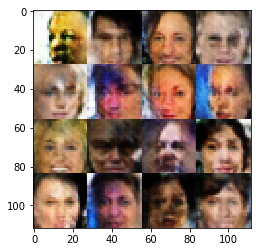

Step : 3310 Epoch 1/1... Discriminator Loss: 1.1578... Generator Loss: 0.9118
Step : 3320 Epoch 1/1... Discriminator Loss: 1.2207... Generator Loss: 0.8683
Step : 3330 Epoch 1/1... Discriminator Loss: 1.3490... Generator Loss: 0.6350
Step : 3340 Epoch 1/1... Discriminator Loss: 1.3144... Generator Loss: 0.7836
Step : 3350 Epoch 1/1... Discriminator Loss: 1.3016... Generator Loss: 0.8428
Step : 3360 Epoch 1/1... Discriminator Loss: 0.9107... Generator Loss: 1.1759
Step : 3370 Epoch 1/1... Discriminator Loss: 1.4856... Generator Loss: 0.4696
Step : 3380 Epoch 1/1... Discriminator Loss: 1.0133... Generator Loss: 0.8977
Step : 3390 Epoch 1/1... Discriminator Loss: 1.5559... Generator Loss: 0.9968
Step : 3400 Epoch 1/1... Discriminator Loss: 1.1930... Generator Loss: 0.6663


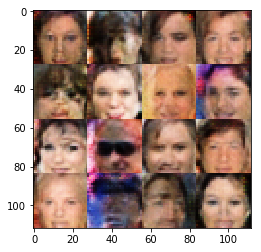

Step : 3410 Epoch 1/1... Discriminator Loss: 1.2419... Generator Loss: 0.6846
Step : 3420 Epoch 1/1... Discriminator Loss: 1.3198... Generator Loss: 0.8900
Step : 3430 Epoch 1/1... Discriminator Loss: 1.1438... Generator Loss: 1.0221
Step : 3440 Epoch 1/1... Discriminator Loss: 1.2910... Generator Loss: 0.6618
Step : 3450 Epoch 1/1... Discriminator Loss: 1.2474... Generator Loss: 1.0787
Step : 3460 Epoch 1/1... Discriminator Loss: 1.4754... Generator Loss: 0.5553
Step : 3470 Epoch 1/1... Discriminator Loss: 1.3856... Generator Loss: 0.6897
Step : 3480 Epoch 1/1... Discriminator Loss: 1.2432... Generator Loss: 0.6959
Step : 3490 Epoch 1/1... Discriminator Loss: 1.3489... Generator Loss: 0.5417
Step : 3500 Epoch 1/1... Discriminator Loss: 1.1894... Generator Loss: 0.7756


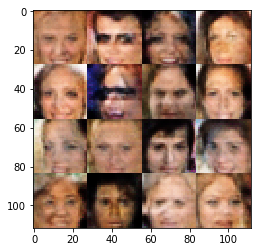

Step : 3510 Epoch 1/1... Discriminator Loss: 1.0968... Generator Loss: 2.2856
Step : 3520 Epoch 1/1... Discriminator Loss: 1.3756... Generator Loss: 0.6646
Step : 3530 Epoch 1/1... Discriminator Loss: 1.1682... Generator Loss: 0.9084
Step : 3540 Epoch 1/1... Discriminator Loss: 1.3101... Generator Loss: 0.6156
Step : 3550 Epoch 1/1... Discriminator Loss: 1.1912... Generator Loss: 0.7719
Step : 3560 Epoch 1/1... Discriminator Loss: 1.2292... Generator Loss: 0.8554
Step : 3570 Epoch 1/1... Discriminator Loss: 1.1830... Generator Loss: 0.8408
Step : 3580 Epoch 1/1... Discriminator Loss: 0.9632... Generator Loss: 1.2713
Step : 3590 Epoch 1/1... Discriminator Loss: 1.0487... Generator Loss: 0.9873
Step : 3600 Epoch 1/1... Discriminator Loss: 1.3523... Generator Loss: 0.6024


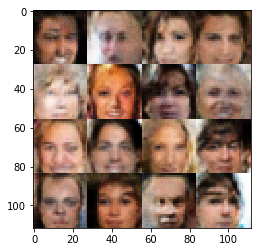

Step : 3610 Epoch 1/1... Discriminator Loss: 1.1393... Generator Loss: 1.2146
Step : 3620 Epoch 1/1... Discriminator Loss: 1.3048... Generator Loss: 0.7730
Step : 3630 Epoch 1/1... Discriminator Loss: 1.1813... Generator Loss: 0.9792
Step : 3640 Epoch 1/1... Discriminator Loss: 1.3981... Generator Loss: 0.6531
Step : 3650 Epoch 1/1... Discriminator Loss: 1.0690... Generator Loss: 0.9426
Step : 3660 Epoch 1/1... Discriminator Loss: 1.2474... Generator Loss: 0.5938
Step : 3670 Epoch 1/1... Discriminator Loss: 1.1744... Generator Loss: 1.2769
Step : 3680 Epoch 1/1... Discriminator Loss: 1.4261... Generator Loss: 0.5896
Step : 3690 Epoch 1/1... Discriminator Loss: 1.2502... Generator Loss: 0.9792
Step : 3700 Epoch 1/1... Discriminator Loss: 1.1877... Generator Loss: 0.7847


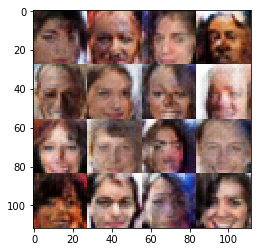

Step : 3710 Epoch 1/1... Discriminator Loss: 1.4734... Generator Loss: 0.8581
Step : 3720 Epoch 1/1... Discriminator Loss: 1.5978... Generator Loss: 0.5797
Step : 3730 Epoch 1/1... Discriminator Loss: 1.2627... Generator Loss: 0.7258
Step : 3740 Epoch 1/1... Discriminator Loss: 1.3455... Generator Loss: 0.6544
Step : 3750 Epoch 1/1... Discriminator Loss: 1.4097... Generator Loss: 0.4641
Step : 3760 Epoch 1/1... Discriminator Loss: 1.3889... Generator Loss: 0.6759
Step : 3770 Epoch 1/1... Discriminator Loss: 1.2616... Generator Loss: 0.6815
Step : 3780 Epoch 1/1... Discriminator Loss: 1.2485... Generator Loss: 1.6252
Step : 3790 Epoch 1/1... Discriminator Loss: 1.3118... Generator Loss: 0.6194
Step : 3800 Epoch 1/1... Discriminator Loss: 1.5679... Generator Loss: 0.4422


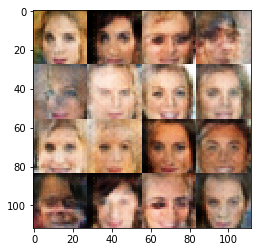

Step : 3810 Epoch 1/1... Discriminator Loss: 1.4073... Generator Loss: 0.4881
Step : 3820 Epoch 1/1... Discriminator Loss: 1.8006... Generator Loss: 0.3002
Step : 3830 Epoch 1/1... Discriminator Loss: 1.1597... Generator Loss: 0.7489
Step : 3840 Epoch 1/1... Discriminator Loss: 1.2065... Generator Loss: 0.6965
Step : 3850 Epoch 1/1... Discriminator Loss: 1.1352... Generator Loss: 1.0294
Step : 3860 Epoch 1/1... Discriminator Loss: 1.7339... Generator Loss: 0.3490
Step : 3870 Epoch 1/1... Discriminator Loss: 1.3923... Generator Loss: 0.7255
Step : 3880 Epoch 1/1... Discriminator Loss: 1.2217... Generator Loss: 0.9696
Step : 3890 Epoch 1/1... Discriminator Loss: 1.4035... Generator Loss: 0.5969
Step : 3900 Epoch 1/1... Discriminator Loss: 1.4758... Generator Loss: 0.8112


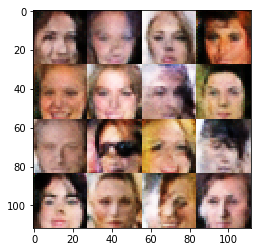

Step : 3910 Epoch 1/1... Discriminator Loss: 1.2008... Generator Loss: 0.9308
Step : 3920 Epoch 1/1... Discriminator Loss: 1.2736... Generator Loss: 0.8228
Step : 3930 Epoch 1/1... Discriminator Loss: 1.1742... Generator Loss: 0.7685
Step : 3940 Epoch 1/1... Discriminator Loss: 1.1519... Generator Loss: 0.9113
Step : 3950 Epoch 1/1... Discriminator Loss: 1.5246... Generator Loss: 0.4510
Step : 3960 Epoch 1/1... Discriminator Loss: 1.1996... Generator Loss: 0.8184
Step : 3970 Epoch 1/1... Discriminator Loss: 1.1928... Generator Loss: 0.7619
Step : 3980 Epoch 1/1... Discriminator Loss: 1.3120... Generator Loss: 0.7543
Step : 3990 Epoch 1/1... Discriminator Loss: 1.4136... Generator Loss: 0.5140
Step : 4000 Epoch 1/1... Discriminator Loss: 1.4989... Generator Loss: 0.4320


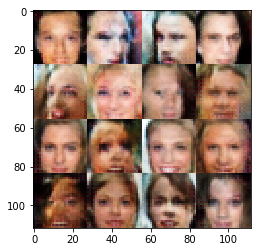

Step : 4010 Epoch 1/1... Discriminator Loss: 1.3155... Generator Loss: 0.7724
Step : 4020 Epoch 1/1... Discriminator Loss: 1.4105... Generator Loss: 0.6625
Step : 4030 Epoch 1/1... Discriminator Loss: 1.2008... Generator Loss: 0.7695
Step : 4040 Epoch 1/1... Discriminator Loss: 1.3060... Generator Loss: 0.6089
Step : 4050 Epoch 1/1... Discriminator Loss: 1.2839... Generator Loss: 0.8017
Step : 4060 Epoch 1/1... Discriminator Loss: 1.2275... Generator Loss: 1.0719
Step : 4070 Epoch 1/1... Discriminator Loss: 1.4298... Generator Loss: 0.7029
Step : 4080 Epoch 1/1... Discriminator Loss: 1.5043... Generator Loss: 0.6192
Step : 4090 Epoch 1/1... Discriminator Loss: 1.3327... Generator Loss: 0.6555
Step : 4100 Epoch 1/1... Discriminator Loss: 1.3632... Generator Loss: 0.7748


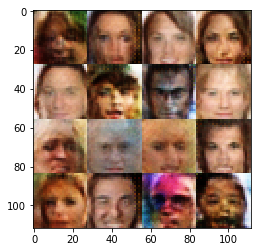

Step : 4110 Epoch 1/1... Discriminator Loss: 1.2260... Generator Loss: 0.8877
Step : 4120 Epoch 1/1... Discriminator Loss: 1.1874... Generator Loss: 0.8665
Step : 4130 Epoch 1/1... Discriminator Loss: 1.2326... Generator Loss: 0.8151
Step : 4140 Epoch 1/1... Discriminator Loss: 1.2711... Generator Loss: 0.7161
Step : 4150 Epoch 1/1... Discriminator Loss: 1.6306... Generator Loss: 0.3685
Step : 4160 Epoch 1/1... Discriminator Loss: 1.3413... Generator Loss: 1.3814
Step : 4170 Epoch 1/1... Discriminator Loss: 1.3914... Generator Loss: 0.6489
Step : 4180 Epoch 1/1... Discriminator Loss: 1.4669... Generator Loss: 0.4913
Step : 4190 Epoch 1/1... Discriminator Loss: 1.2019... Generator Loss: 1.0854
Step : 4200 Epoch 1/1... Discriminator Loss: 0.9871... Generator Loss: 1.3379


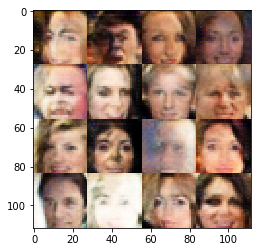

Step : 4210 Epoch 1/1... Discriminator Loss: 1.3109... Generator Loss: 0.8152
Step : 4220 Epoch 1/1... Discriminator Loss: 1.1336... Generator Loss: 1.0964
Step : 4230 Epoch 1/1... Discriminator Loss: 1.3586... Generator Loss: 0.6871
Step : 4240 Epoch 1/1... Discriminator Loss: 1.1744... Generator Loss: 0.8682
Step : 4250 Epoch 1/1... Discriminator Loss: 1.4526... Generator Loss: 0.5177
Step : 4260 Epoch 1/1... Discriminator Loss: 0.5203... Generator Loss: 2.7117
Step : 4270 Epoch 1/1... Discriminator Loss: 1.2625... Generator Loss: 1.0363
Step : 4280 Epoch 1/1... Discriminator Loss: 1.1132... Generator Loss: 0.9254
Step : 4290 Epoch 1/1... Discriminator Loss: 1.3410... Generator Loss: 0.6722
Step : 4300 Epoch 1/1... Discriminator Loss: 1.0863... Generator Loss: 0.9155


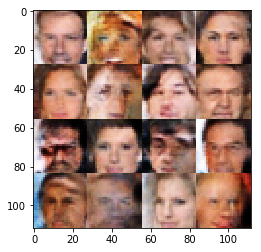

Step : 4310 Epoch 1/1... Discriminator Loss: 1.3205... Generator Loss: 0.7352
Step : 4320 Epoch 1/1... Discriminator Loss: 1.3839... Generator Loss: 0.6686
Step : 4330 Epoch 1/1... Discriminator Loss: 1.2946... Generator Loss: 0.7219
Step : 4340 Epoch 1/1... Discriminator Loss: 1.4537... Generator Loss: 0.5235
Step : 4350 Epoch 1/1... Discriminator Loss: 1.3944... Generator Loss: 0.5377
Step : 4360 Epoch 1/1... Discriminator Loss: 1.4678... Generator Loss: 0.6110
Step : 4370 Epoch 1/1... Discriminator Loss: 1.2520... Generator Loss: 0.6211
Step : 4380 Epoch 1/1... Discriminator Loss: 1.2891... Generator Loss: 1.3329
Step : 4390 Epoch 1/1... Discriminator Loss: 1.3689... Generator Loss: 0.6960
Step : 4400 Epoch 1/1... Discriminator Loss: 1.4226... Generator Loss: 0.6462


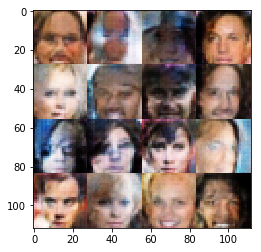

Step : 4410 Epoch 1/1... Discriminator Loss: 1.3541... Generator Loss: 0.6894
Step : 4420 Epoch 1/1... Discriminator Loss: 1.3632... Generator Loss: 0.5578
Step : 4430 Epoch 1/1... Discriminator Loss: 1.3388... Generator Loss: 0.5767
Step : 4440 Epoch 1/1... Discriminator Loss: 1.2580... Generator Loss: 0.7779
Step : 4450 Epoch 1/1... Discriminator Loss: 1.3479... Generator Loss: 0.6708
Step : 4460 Epoch 1/1... Discriminator Loss: 1.5116... Generator Loss: 0.5130
Step : 4470 Epoch 1/1... Discriminator Loss: 1.1266... Generator Loss: 1.0320
Step : 4480 Epoch 1/1... Discriminator Loss: 1.3656... Generator Loss: 0.6558
Step : 4490 Epoch 1/1... Discriminator Loss: 1.1007... Generator Loss: 0.9980
Step : 4500 Epoch 1/1... Discriminator Loss: 1.4797... Generator Loss: 0.4903


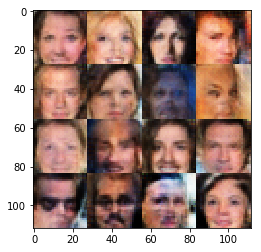

Step : 4510 Epoch 1/1... Discriminator Loss: 1.3610... Generator Loss: 0.5815
Step : 4520 Epoch 1/1... Discriminator Loss: 1.1728... Generator Loss: 0.8578
Step : 4530 Epoch 1/1... Discriminator Loss: 1.5414... Generator Loss: 0.5391
Step : 4540 Epoch 1/1... Discriminator Loss: 1.3687... Generator Loss: 0.6907
Step : 4550 Epoch 1/1... Discriminator Loss: 1.4561... Generator Loss: 0.6066
Step : 4560 Epoch 1/1... Discriminator Loss: 1.2757... Generator Loss: 0.8587
Step : 4570 Epoch 1/1... Discriminator Loss: 1.2993... Generator Loss: 0.6616
Step : 4580 Epoch 1/1... Discriminator Loss: 1.2894... Generator Loss: 0.6615
Step : 4590 Epoch 1/1... Discriminator Loss: 1.4604... Generator Loss: 0.6362
Step : 4600 Epoch 1/1... Discriminator Loss: 1.2616... Generator Loss: 0.7383


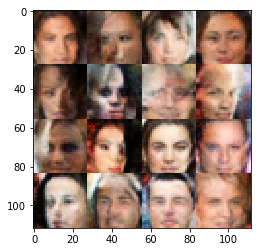

Step : 4610 Epoch 1/1... Discriminator Loss: 1.2963... Generator Loss: 0.7408
Step : 4620 Epoch 1/1... Discriminator Loss: 1.2996... Generator Loss: 0.7415
Step : 4630 Epoch 1/1... Discriminator Loss: 1.4279... Generator Loss: 0.6191
Step : 4640 Epoch 1/1... Discriminator Loss: 1.2494... Generator Loss: 0.7617
Step : 4650 Epoch 1/1... Discriminator Loss: 1.3510... Generator Loss: 0.6837
Step : 4660 Epoch 1/1... Discriminator Loss: 1.1897... Generator Loss: 0.8000
Step : 4670 Epoch 1/1... Discriminator Loss: 1.3030... Generator Loss: 0.6665
Step : 4680 Epoch 1/1... Discriminator Loss: 1.2039... Generator Loss: 0.9724
Step : 4690 Epoch 1/1... Discriminator Loss: 1.3644... Generator Loss: 0.6544
Step : 4700 Epoch 1/1... Discriminator Loss: 1.2252... Generator Loss: 0.8086


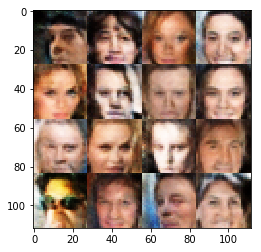

Step : 4710 Epoch 1/1... Discriminator Loss: 1.4341... Generator Loss: 0.6190
Step : 4720 Epoch 1/1... Discriminator Loss: 1.4845... Generator Loss: 0.5853
Step : 4730 Epoch 1/1... Discriminator Loss: 1.3222... Generator Loss: 0.7235
Step : 4740 Epoch 1/1... Discriminator Loss: 1.3992... Generator Loss: 0.5850
Step : 4750 Epoch 1/1... Discriminator Loss: 1.1492... Generator Loss: 0.8842
Step : 4760 Epoch 1/1... Discriminator Loss: 1.3306... Generator Loss: 0.6577
Step : 4770 Epoch 1/1... Discriminator Loss: 1.4157... Generator Loss: 0.5541
Step : 4780 Epoch 1/1... Discriminator Loss: 1.4196... Generator Loss: 0.6561
Step : 4790 Epoch 1/1... Discriminator Loss: 1.3588... Generator Loss: 0.7397
Step : 4800 Epoch 1/1... Discriminator Loss: 1.2550... Generator Loss: 0.6981


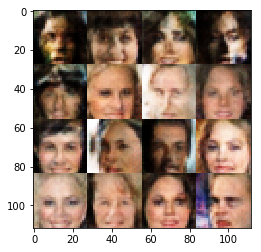

Step : 4810 Epoch 1/1... Discriminator Loss: 1.4557... Generator Loss: 0.5241
Step : 4820 Epoch 1/1... Discriminator Loss: 1.4757... Generator Loss: 0.6435
Step : 4830 Epoch 1/1... Discriminator Loss: 1.3279... Generator Loss: 0.8610
Step : 4840 Epoch 1/1... Discriminator Loss: 1.3913... Generator Loss: 0.7935
Step : 4850 Epoch 1/1... Discriminator Loss: 1.4171... Generator Loss: 0.5111
Step : 4860 Epoch 1/1... Discriminator Loss: 1.5072... Generator Loss: 0.5471
Step : 4870 Epoch 1/1... Discriminator Loss: 1.3097... Generator Loss: 0.7248
Step : 4880 Epoch 1/1... Discriminator Loss: 1.2707... Generator Loss: 0.6950
Step : 4890 Epoch 1/1... Discriminator Loss: 1.2744... Generator Loss: 0.8765
Step : 4900 Epoch 1/1... Discriminator Loss: 1.1994... Generator Loss: 0.8922


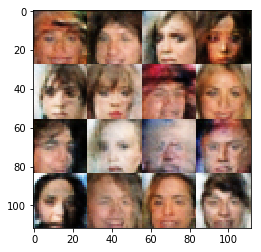

Step : 4910 Epoch 1/1... Discriminator Loss: 1.0386... Generator Loss: 0.8984
Step : 4920 Epoch 1/1... Discriminator Loss: 1.3191... Generator Loss: 0.7967
Step : 4930 Epoch 1/1... Discriminator Loss: 1.1358... Generator Loss: 0.8625
Step : 4940 Epoch 1/1... Discriminator Loss: 1.3432... Generator Loss: 0.8259
Step : 4950 Epoch 1/1... Discriminator Loss: 1.3800... Generator Loss: 0.5952
Step : 4960 Epoch 1/1... Discriminator Loss: 1.2324... Generator Loss: 0.7458
Step : 4970 Epoch 1/1... Discriminator Loss: 0.8191... Generator Loss: 1.4489
Step : 4980 Epoch 1/1... Discriminator Loss: 1.2701... Generator Loss: 0.6377
Step : 4990 Epoch 1/1... Discriminator Loss: 1.4213... Generator Loss: 0.5848
Step : 5000 Epoch 1/1... Discriminator Loss: 1.3889... Generator Loss: 0.6076


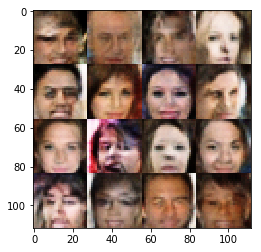

Step : 5010 Epoch 1/1... Discriminator Loss: 1.4652... Generator Loss: 0.5988
Step : 5020 Epoch 1/1... Discriminator Loss: 1.4011... Generator Loss: 0.6966
Step : 5030 Epoch 1/1... Discriminator Loss: 1.2519... Generator Loss: 0.7686
Step : 5040 Epoch 1/1... Discriminator Loss: 1.3322... Generator Loss: 0.7009
Step : 5050 Epoch 1/1... Discriminator Loss: 1.4484... Generator Loss: 0.5892
Step : 5060 Epoch 1/1... Discriminator Loss: 1.4839... Generator Loss: 0.6945
Step : 5070 Epoch 1/1... Discriminator Loss: 1.3937... Generator Loss: 0.6375
Step : 5080 Epoch 1/1... Discriminator Loss: 1.3969... Generator Loss: 0.5953
Step : 5090 Epoch 1/1... Discriminator Loss: 1.2611... Generator Loss: 0.7014
Step : 5100 Epoch 1/1... Discriminator Loss: 1.2080... Generator Loss: 0.7400


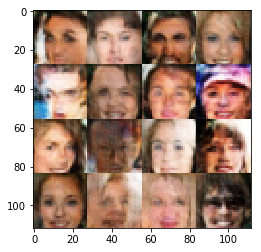

Step : 5110 Epoch 1/1... Discriminator Loss: 1.4049... Generator Loss: 0.4917
Step : 5120 Epoch 1/1... Discriminator Loss: 1.2076... Generator Loss: 0.7259
Step : 5130 Epoch 1/1... Discriminator Loss: 1.2872... Generator Loss: 0.7673
Step : 5140 Epoch 1/1... Discriminator Loss: 1.1176... Generator Loss: 0.7925
Step : 5150 Epoch 1/1... Discriminator Loss: 1.2563... Generator Loss: 0.8283
Step : 5160 Epoch 1/1... Discriminator Loss: 1.2734... Generator Loss: 0.7094
Step : 5170 Epoch 1/1... Discriminator Loss: 1.3664... Generator Loss: 0.7271
Step : 5180 Epoch 1/1... Discriminator Loss: 1.2564... Generator Loss: 0.7906
Step : 5190 Epoch 1/1... Discriminator Loss: 1.2526... Generator Loss: 0.9072
Step : 5200 Epoch 1/1... Discriminator Loss: 1.1624... Generator Loss: 0.8410


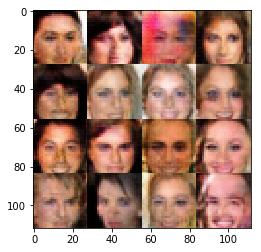

Step : 5210 Epoch 1/1... Discriminator Loss: 1.3350... Generator Loss: 0.7303
Step : 5220 Epoch 1/1... Discriminator Loss: 1.4976... Generator Loss: 0.6421
Step : 5230 Epoch 1/1... Discriminator Loss: 1.2365... Generator Loss: 0.7850
Step : 5240 Epoch 1/1... Discriminator Loss: 1.4448... Generator Loss: 0.5863
Step : 5250 Epoch 1/1... Discriminator Loss: 1.3470... Generator Loss: 0.7401
Step : 5260 Epoch 1/1... Discriminator Loss: 1.2081... Generator Loss: 0.9228
Step : 5270 Epoch 1/1... Discriminator Loss: 1.1559... Generator Loss: 0.8737
Step : 5280 Epoch 1/1... Discriminator Loss: 1.3328... Generator Loss: 0.6568
Step : 5290 Epoch 1/1... Discriminator Loss: 1.5642... Generator Loss: 0.5050
Step : 5300 Epoch 1/1... Discriminator Loss: 1.3485... Generator Loss: 0.7245


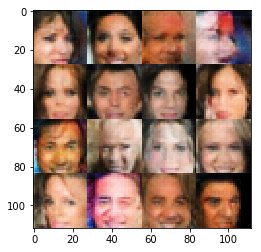

Step : 5310 Epoch 1/1... Discriminator Loss: 1.4021... Generator Loss: 0.7032
Step : 5320 Epoch 1/1... Discriminator Loss: 1.2271... Generator Loss: 0.7715
Step : 5330 Epoch 1/1... Discriminator Loss: 1.3727... Generator Loss: 0.8038
Step : 5340 Epoch 1/1... Discriminator Loss: 1.2270... Generator Loss: 0.8197
Step : 5350 Epoch 1/1... Discriminator Loss: 1.0210... Generator Loss: 1.2784
Step : 5360 Epoch 1/1... Discriminator Loss: 1.3494... Generator Loss: 0.6445
Step : 5370 Epoch 1/1... Discriminator Loss: 1.3907... Generator Loss: 0.7008
Step : 5380 Epoch 1/1... Discriminator Loss: 1.3052... Generator Loss: 0.7820
Step : 5390 Epoch 1/1... Discriminator Loss: 1.2683... Generator Loss: 1.0947
Step : 5400 Epoch 1/1... Discriminator Loss: 1.1693... Generator Loss: 0.9213


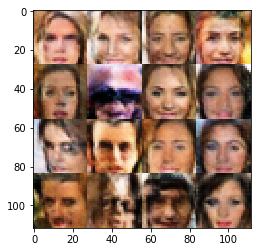

Step : 5410 Epoch 1/1... Discriminator Loss: 1.4509... Generator Loss: 0.5674
Step : 5420 Epoch 1/1... Discriminator Loss: 1.8027... Generator Loss: 0.4999
Step : 5430 Epoch 1/1... Discriminator Loss: 1.4502... Generator Loss: 0.5528
Step : 5440 Epoch 1/1... Discriminator Loss: 1.2018... Generator Loss: 0.9916
Step : 5450 Epoch 1/1... Discriminator Loss: 1.4705... Generator Loss: 0.5408
Step : 5460 Epoch 1/1... Discriminator Loss: 1.1311... Generator Loss: 1.0613
Step : 5470 Epoch 1/1... Discriminator Loss: 1.4628... Generator Loss: 0.7223
Step : 5480 Epoch 1/1... Discriminator Loss: 1.2990... Generator Loss: 0.7622
Step : 5490 Epoch 1/1... Discriminator Loss: 1.4974... Generator Loss: 0.4977
Step : 5500 Epoch 1/1... Discriminator Loss: 1.3082... Generator Loss: 0.7967


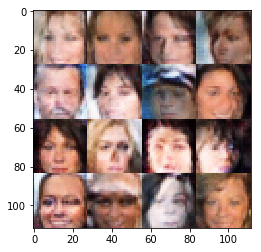

Step : 5510 Epoch 1/1... Discriminator Loss: 1.4752... Generator Loss: 0.4710
Step : 5520 Epoch 1/1... Discriminator Loss: 1.2077... Generator Loss: 0.7901
Step : 5530 Epoch 1/1... Discriminator Loss: 1.4470... Generator Loss: 0.6646
Step : 5540 Epoch 1/1... Discriminator Loss: 1.3079... Generator Loss: 0.6957
Step : 5550 Epoch 1/1... Discriminator Loss: 1.4621... Generator Loss: 0.4820
Step : 5560 Epoch 1/1... Discriminator Loss: 1.4864... Generator Loss: 0.6857
Step : 5570 Epoch 1/1... Discriminator Loss: 1.3935... Generator Loss: 0.7040
Step : 5580 Epoch 1/1... Discriminator Loss: 1.3487... Generator Loss: 0.6103
Step : 5590 Epoch 1/1... Discriminator Loss: 0.9507... Generator Loss: 1.1898
Step : 5600 Epoch 1/1... Discriminator Loss: 1.2507... Generator Loss: 0.7702


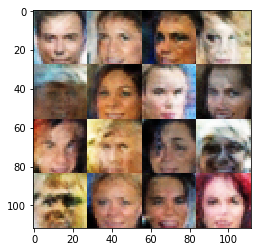

Step : 5610 Epoch 1/1... Discriminator Loss: 1.2646... Generator Loss: 0.7577
Step : 5620 Epoch 1/1... Discriminator Loss: 1.3124... Generator Loss: 0.7067
Step : 5630 Epoch 1/1... Discriminator Loss: 1.3861... Generator Loss: 0.6490
Step : 5640 Epoch 1/1... Discriminator Loss: 1.2519... Generator Loss: 0.6680
Step : 5650 Epoch 1/1... Discriminator Loss: 1.3435... Generator Loss: 0.6841
Step : 5660 Epoch 1/1... Discriminator Loss: 1.4240... Generator Loss: 0.6970
Step : 5670 Epoch 1/1... Discriminator Loss: 1.5605... Generator Loss: 0.6261
Step : 5680 Epoch 1/1... Discriminator Loss: 1.2539... Generator Loss: 0.6819
Step : 5690 Epoch 1/1... Discriminator Loss: 1.2973... Generator Loss: 0.8374
Step : 5700 Epoch 1/1... Discriminator Loss: 1.4297... Generator Loss: 0.6312


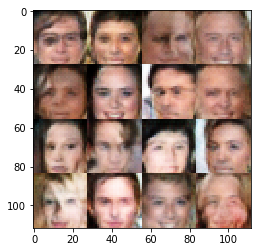

Step : 5710 Epoch 1/1... Discriminator Loss: 1.4096... Generator Loss: 0.5753
Step : 5720 Epoch 1/1... Discriminator Loss: 1.3592... Generator Loss: 0.6470
Step : 5730 Epoch 1/1... Discriminator Loss: 1.1225... Generator Loss: 0.8389
Step : 5740 Epoch 1/1... Discriminator Loss: 1.4000... Generator Loss: 0.5999
Step : 5750 Epoch 1/1... Discriminator Loss: 1.1918... Generator Loss: 0.7943
Step : 5760 Epoch 1/1... Discriminator Loss: 1.2580... Generator Loss: 0.8512
Step : 5770 Epoch 1/1... Discriminator Loss: 1.3156... Generator Loss: 0.7188
Step : 5780 Epoch 1/1... Discriminator Loss: 1.3602... Generator Loss: 0.6671
Step : 5790 Epoch 1/1... Discriminator Loss: 1.3710... Generator Loss: 0.5443
Step : 5800 Epoch 1/1... Discriminator Loss: 1.4773... Generator Loss: 0.6484


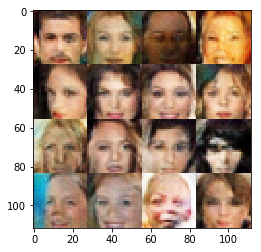

Step : 5810 Epoch 1/1... Discriminator Loss: 1.3734... Generator Loss: 0.6723
Step : 5820 Epoch 1/1... Discriminator Loss: 1.3335... Generator Loss: 0.6628
Step : 5830 Epoch 1/1... Discriminator Loss: 1.1041... Generator Loss: 1.0072
Step : 5840 Epoch 1/1... Discriminator Loss: 1.4262... Generator Loss: 0.5137
Step : 5850 Epoch 1/1... Discriminator Loss: 1.3236... Generator Loss: 0.6764
Step : 5860 Epoch 1/1... Discriminator Loss: 1.5331... Generator Loss: 0.4850
Step : 5870 Epoch 1/1... Discriminator Loss: 1.3792... Generator Loss: 0.6114
Step : 5880 Epoch 1/1... Discriminator Loss: 1.3133... Generator Loss: 0.7436
Step : 5890 Epoch 1/1... Discriminator Loss: 1.4242... Generator Loss: 0.5906
Step : 5900 Epoch 1/1... Discriminator Loss: 1.2563... Generator Loss: 0.8368


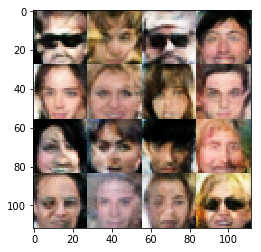

Step : 5910 Epoch 1/1... Discriminator Loss: 0.7124... Generator Loss: 2.5191
Step : 5920 Epoch 1/1... Discriminator Loss: 1.3085... Generator Loss: 0.6661
Step : 5930 Epoch 1/1... Discriminator Loss: 1.1996... Generator Loss: 0.9312
Step : 5940 Epoch 1/1... Discriminator Loss: 1.2485... Generator Loss: 0.8118
Step : 5950 Epoch 1/1... Discriminator Loss: 1.3267... Generator Loss: 0.6703
Step : 5960 Epoch 1/1... Discriminator Loss: 1.3341... Generator Loss: 0.6330
Step : 5970 Epoch 1/1... Discriminator Loss: 1.2699... Generator Loss: 0.7729
Step : 5980 Epoch 1/1... Discriminator Loss: 1.5547... Generator Loss: 0.6173
Step : 5990 Epoch 1/1... Discriminator Loss: 1.4089... Generator Loss: 0.6720
Step : 6000 Epoch 1/1... Discriminator Loss: 1.1876... Generator Loss: 0.8065


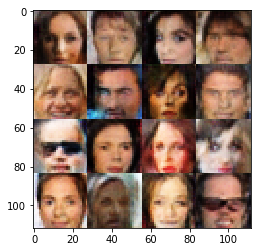

Step : 6010 Epoch 1/1... Discriminator Loss: 1.1613... Generator Loss: 0.8850
Step : 6020 Epoch 1/1... Discriminator Loss: 1.4252... Generator Loss: 0.6537
Step : 6030 Epoch 1/1... Discriminator Loss: 1.5429... Generator Loss: 0.5648
Step : 6040 Epoch 1/1... Discriminator Loss: 1.4151... Generator Loss: 0.6310
Step : 6050 Epoch 1/1... Discriminator Loss: 1.3177... Generator Loss: 0.7586
Step : 6060 Epoch 1/1... Discriminator Loss: 1.2375... Generator Loss: 0.8165
Step : 6070 Epoch 1/1... Discriminator Loss: 1.3182... Generator Loss: 0.7490
Step : 6080 Epoch 1/1... Discriminator Loss: 1.4599... Generator Loss: 0.5991
Step : 6090 Epoch 1/1... Discriminator Loss: 1.2788... Generator Loss: 0.6806
Step : 6100 Epoch 1/1... Discriminator Loss: 1.5707... Generator Loss: 0.5435


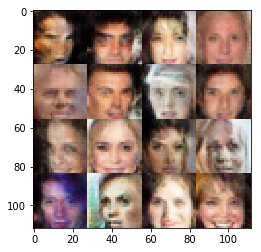

Step : 6110 Epoch 1/1... Discriminator Loss: 1.4002... Generator Loss: 0.6979
Step : 6120 Epoch 1/1... Discriminator Loss: 1.2257... Generator Loss: 0.8266
Step : 6130 Epoch 1/1... Discriminator Loss: 1.3682... Generator Loss: 0.6756
Step : 6140 Epoch 1/1... Discriminator Loss: 1.3084... Generator Loss: 0.6849
Step : 6150 Epoch 1/1... Discriminator Loss: 1.2940... Generator Loss: 0.7888
Step : 6160 Epoch 1/1... Discriminator Loss: 1.4423... Generator Loss: 0.6301
Step : 6170 Epoch 1/1... Discriminator Loss: 1.3613... Generator Loss: 0.6901
Step : 6180 Epoch 1/1... Discriminator Loss: 1.7628... Generator Loss: 0.5270
Step : 6190 Epoch 1/1... Discriminator Loss: 1.3935... Generator Loss: 0.6285
Step : 6200 Epoch 1/1... Discriminator Loss: 1.2799... Generator Loss: 0.7563


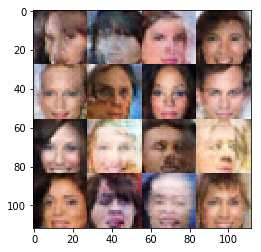

Step : 6210 Epoch 1/1... Discriminator Loss: 1.2770... Generator Loss: 0.7312
Step : 6220 Epoch 1/1... Discriminator Loss: 1.3783... Generator Loss: 0.6253
Step : 6230 Epoch 1/1... Discriminator Loss: 1.3779... Generator Loss: 0.7403
Step : 6240 Epoch 1/1... Discriminator Loss: 1.3982... Generator Loss: 0.7942
Step : 6250 Epoch 1/1... Discriminator Loss: 1.2455... Generator Loss: 0.7916
Step : 6260 Epoch 1/1... Discriminator Loss: 1.1701... Generator Loss: 0.8458
Step : 6270 Epoch 1/1... Discriminator Loss: 1.3603... Generator Loss: 0.6869
Step : 6280 Epoch 1/1... Discriminator Loss: 1.2638... Generator Loss: 0.8390
Step : 6290 Epoch 1/1... Discriminator Loss: 1.5084... Generator Loss: 0.5389
Step : 6300 Epoch 1/1... Discriminator Loss: 1.2715... Generator Loss: 0.6686


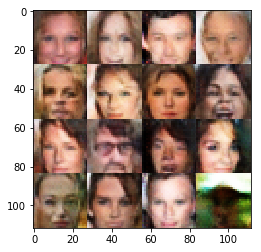

Step : 6310 Epoch 1/1... Discriminator Loss: 1.4084... Generator Loss: 0.6453
Step : 6320 Epoch 1/1... Discriminator Loss: 1.2913... Generator Loss: 0.7098
Step : 6330 Epoch 1/1... Discriminator Loss: 1.4727... Generator Loss: 0.5763
Step : 6340 Epoch 1/1... Discriminator Loss: 1.0931... Generator Loss: 0.9807
Step : 6350 Epoch 1/1... Discriminator Loss: 1.4030... Generator Loss: 0.6003
Step : 6360 Epoch 1/1... Discriminator Loss: 1.1732... Generator Loss: 0.8452
Step : 6370 Epoch 1/1... Discriminator Loss: 1.4065... Generator Loss: 0.6807
Step : 6380 Epoch 1/1... Discriminator Loss: 1.2118... Generator Loss: 0.8182
Step : 6390 Epoch 1/1... Discriminator Loss: 1.3612... Generator Loss: 0.7640
Step : 6400 Epoch 1/1... Discriminator Loss: 1.2223... Generator Loss: 0.7266


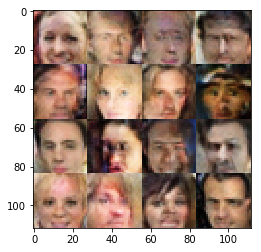

Step : 6410 Epoch 1/1... Discriminator Loss: 1.5315... Generator Loss: 0.5744
Step : 6420 Epoch 1/1... Discriminator Loss: 1.5513... Generator Loss: 0.5786
Step : 6430 Epoch 1/1... Discriminator Loss: 1.3408... Generator Loss: 0.6449
Step : 6440 Epoch 1/1... Discriminator Loss: 1.2601... Generator Loss: 0.7189
Step : 6450 Epoch 1/1... Discriminator Loss: 1.1991... Generator Loss: 0.8400
Step : 6460 Epoch 1/1... Discriminator Loss: 1.4692... Generator Loss: 0.6697
Step : 6470 Epoch 1/1... Discriminator Loss: 1.4777... Generator Loss: 0.4902
Step : 6480 Epoch 1/1... Discriminator Loss: 1.3964... Generator Loss: 0.5799
Step : 6490 Epoch 1/1... Discriminator Loss: 1.4502... Generator Loss: 0.7317
Step : 6500 Epoch 1/1... Discriminator Loss: 1.5078... Generator Loss: 0.5923


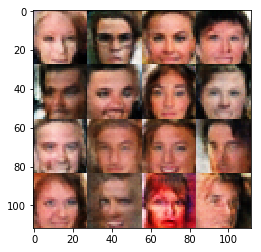

Step : 6510 Epoch 1/1... Discriminator Loss: 1.4574... Generator Loss: 0.6624
Step : 6520 Epoch 1/1... Discriminator Loss: 1.4301... Generator Loss: 0.6329
Step : 6530 Epoch 1/1... Discriminator Loss: 1.3016... Generator Loss: 0.8088
Step : 6540 Epoch 1/1... Discriminator Loss: 1.4237... Generator Loss: 0.6786
Step : 6550 Epoch 1/1... Discriminator Loss: 1.3144... Generator Loss: 0.6563
Step : 6560 Epoch 1/1... Discriminator Loss: 1.3232... Generator Loss: 0.6563
Step : 6570 Epoch 1/1... Discriminator Loss: 1.2495... Generator Loss: 0.7945
Step : 6580 Epoch 1/1... Discriminator Loss: 1.4537... Generator Loss: 0.5624
Step : 6590 Epoch 1/1... Discriminator Loss: 1.5402... Generator Loss: 0.6347
Step : 6600 Epoch 1/1... Discriminator Loss: 1.2995... Generator Loss: 0.6790


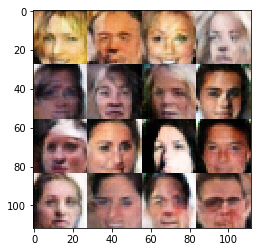

Step : 6610 Epoch 1/1... Discriminator Loss: 1.4322... Generator Loss: 0.5867
Step : 6620 Epoch 1/1... Discriminator Loss: 1.3728... Generator Loss: 0.7283
Step : 6630 Epoch 1/1... Discriminator Loss: 1.2818... Generator Loss: 0.8016
Step : 6640 Epoch 1/1... Discriminator Loss: 1.3478... Generator Loss: 0.6678
Step : 6650 Epoch 1/1... Discriminator Loss: 1.4361... Generator Loss: 0.5348
Step : 6660 Epoch 1/1... Discriminator Loss: 1.2366... Generator Loss: 0.7250
Step : 6670 Epoch 1/1... Discriminator Loss: 1.4754... Generator Loss: 0.6639
Step : 6680 Epoch 1/1... Discriminator Loss: 1.0688... Generator Loss: 1.0143
Step : 6690 Epoch 1/1... Discriminator Loss: 1.3820... Generator Loss: 0.6647
Step : 6700 Epoch 1/1... Discriminator Loss: 1.3250... Generator Loss: 0.7275


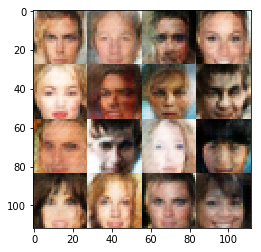

Step : 6710 Epoch 1/1... Discriminator Loss: 1.2416... Generator Loss: 0.8722
Step : 6720 Epoch 1/1... Discriminator Loss: 1.1791... Generator Loss: 0.8474
Step : 6730 Epoch 1/1... Discriminator Loss: 1.3559... Generator Loss: 0.6279
Step : 6740 Epoch 1/1... Discriminator Loss: 1.4164... Generator Loss: 0.6180
Step : 6750 Epoch 1/1... Discriminator Loss: 1.4431... Generator Loss: 0.6250
Step : 6760 Epoch 1/1... Discriminator Loss: 1.2743... Generator Loss: 0.7812
Step : 6770 Epoch 1/1... Discriminator Loss: 1.1543... Generator Loss: 0.8962
Step : 6780 Epoch 1/1... Discriminator Loss: 1.6720... Generator Loss: 0.4550
Step : 6790 Epoch 1/1... Discriminator Loss: 1.4675... Generator Loss: 0.5650
Step : 6800 Epoch 1/1... Discriminator Loss: 1.4428... Generator Loss: 0.6117


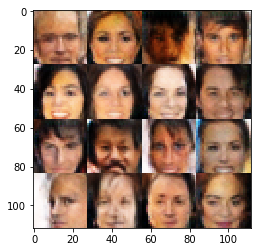

Step : 6810 Epoch 1/1... Discriminator Loss: 1.3548... Generator Loss: 0.6433
Step : 6820 Epoch 1/1... Discriminator Loss: 1.2208... Generator Loss: 0.7665
Step : 6830 Epoch 1/1... Discriminator Loss: 1.3554... Generator Loss: 0.6639
Step : 6840 Epoch 1/1... Discriminator Loss: 1.4441... Generator Loss: 0.6286
Step : 6850 Epoch 1/1... Discriminator Loss: 1.4371... Generator Loss: 0.5808
Step : 6860 Epoch 1/1... Discriminator Loss: 1.5412... Generator Loss: 0.5704
Step : 6870 Epoch 1/1... Discriminator Loss: 1.4886... Generator Loss: 0.5459
Step : 6880 Epoch 1/1... Discriminator Loss: 1.2879... Generator Loss: 0.7721
Step : 6890 Epoch 1/1... Discriminator Loss: 1.2796... Generator Loss: 0.7546
Step : 6900 Epoch 1/1... Discriminator Loss: 1.2792... Generator Loss: 0.7944


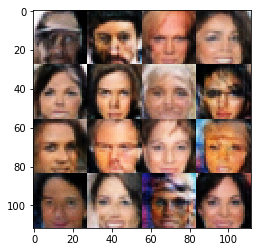

Step : 6910 Epoch 1/1... Discriminator Loss: 1.1628... Generator Loss: 0.9819
Step : 6920 Epoch 1/1... Discriminator Loss: 1.2733... Generator Loss: 0.7120
Step : 6930 Epoch 1/1... Discriminator Loss: 1.3977... Generator Loss: 0.6560
Step : 6940 Epoch 1/1... Discriminator Loss: 1.6833... Generator Loss: 0.5228
Step : 6950 Epoch 1/1... Discriminator Loss: 1.2024... Generator Loss: 0.8363
Step : 6960 Epoch 1/1... Discriminator Loss: 1.2402... Generator Loss: 1.0413
Step : 6970 Epoch 1/1... Discriminator Loss: 1.1673... Generator Loss: 0.9076
Step : 6980 Epoch 1/1... Discriminator Loss: 1.7628... Generator Loss: 0.4013
Step : 6990 Epoch 1/1... Discriminator Loss: 1.3616... Generator Loss: 0.6481
Step : 7000 Epoch 1/1... Discriminator Loss: 1.3349... Generator Loss: 0.7735


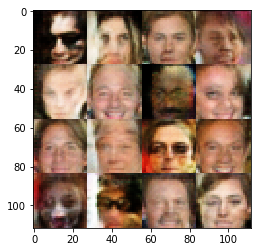

Step : 7010 Epoch 1/1... Discriminator Loss: 1.2696... Generator Loss: 0.9736
Step : 7020 Epoch 1/1... Discriminator Loss: 1.3791... Generator Loss: 0.7229
Step : 7030 Epoch 1/1... Discriminator Loss: 1.4096... Generator Loss: 0.5369
Step : 7040 Epoch 1/1... Discriminator Loss: 1.3504... Generator Loss: 0.6534
Step : 7050 Epoch 1/1... Discriminator Loss: 1.3369... Generator Loss: 0.6918
Step : 7060 Epoch 1/1... Discriminator Loss: 1.4893... Generator Loss: 0.6101
Step : 7070 Epoch 1/1... Discriminator Loss: 1.4339... Generator Loss: 0.5985
Step : 7080 Epoch 1/1... Discriminator Loss: 1.2449... Generator Loss: 0.8614
Step : 7090 Epoch 1/1... Discriminator Loss: 1.6431... Generator Loss: 0.4514
Step : 7100 Epoch 1/1... Discriminator Loss: 1.3752... Generator Loss: 0.7029


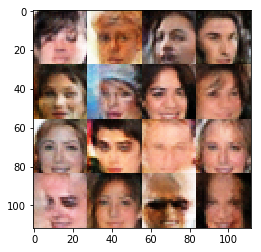

Step : 7110 Epoch 1/1... Discriminator Loss: 1.2026... Generator Loss: 0.9054
Step : 7120 Epoch 1/1... Discriminator Loss: 1.4389... Generator Loss: 0.6815
Step : 7130 Epoch 1/1... Discriminator Loss: 1.4194... Generator Loss: 0.6523
Step : 7140 Epoch 1/1... Discriminator Loss: 1.5424... Generator Loss: 0.6448
Step : 7150 Epoch 1/1... Discriminator Loss: 1.4377... Generator Loss: 0.5692
Step : 7160 Epoch 1/1... Discriminator Loss: 1.3952... Generator Loss: 0.6677
Step : 7170 Epoch 1/1... Discriminator Loss: 1.2457... Generator Loss: 0.7765
Step : 7180 Epoch 1/1... Discriminator Loss: 1.2508... Generator Loss: 0.7170
Step : 7190 Epoch 1/1... Discriminator Loss: 1.4600... Generator Loss: 0.5605
Step : 7200 Epoch 1/1... Discriminator Loss: 1.3934... Generator Loss: 0.5841


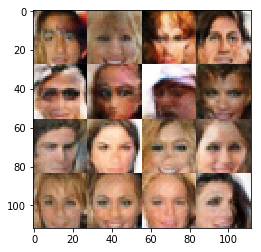

Step : 7210 Epoch 1/1... Discriminator Loss: 1.3923... Generator Loss: 0.6409
Step : 7220 Epoch 1/1... Discriminator Loss: 1.2451... Generator Loss: 0.7577
Step : 7230 Epoch 1/1... Discriminator Loss: 1.4133... Generator Loss: 0.6474
celeba complete


In [26]:
#batch_size = 64
#z_dim = 100
#learning_rate = 0.0002
#beta1 = 0.5

batch_size = 28
z_dim = 100
learning_rate = 0.0004
beta1 = 0.5

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)
print("celeba complete")

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.